In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="darkgrid")

In [ ]:
# Fetching data from the csv file
df=pd.read_csv("India-Tourism-Statistics-1981-2020-fta_nri_ita.csv")
fta_nri_ita=df.copy()
fta_nri_ita.head()

,Year,FTAs in India (in million),%- change over previous year,NRIs arrivals in India (in million),%- change over the previous year,ITAs in India (in million),%- change over the previous year.1
0,1981,1.28,2.0,NaN,NaN,NaN,NaN
1,1991,1.68,-1.7,NaN,NaN,NaN,NaN
2,2001,2.54,-4.2,NaN,NaN,NaN,NaN
3,2002,2.38,-6.0,NaN,NaN,NaN,NaN
4,2003,2.73,14.3,NaN,NaN,NaN,NaN


In [ ]:
# renaming and dropping columns
fta_nri_ita.rename(columns={'FTAs in India (in million)': 'FTA','NRIs arrivals in India (in million)':'NRI','ITAs in India  (in million)':'ITA'},inplace=True, errors='raise')
fta_nri_ita.drop(fta_nri_ita.iloc[:,2::2],axis=1,inplace=True)
fta_nri_ita.head()

,Year,FTA,NRI,ITA
0,1981,1.28,NaN,NaN
1,1991,1.68,NaN,NaN
2,2001,2.54,NaN,NaN
3,2002,2.38,NaN,NaN
4,2003,2.73,NaN,NaN


In [ ]:
# Combining columns FTA,NRI,ITA into a single column 'value' and column 'variable' will distinguish these values
df=pd.melt(fta_nri_ita,['Year']).rename(columns={'variable':'Tourists'})
df

,Year,Tourists,value
0,1981,FTA,1.28
1,1991,FTA,1.68
2,2001,FTA,2.54
3,2002,FTA,2.38
4,2003,FTA,2.73
...,...,...,...
61,2016,ITA,15.03
62,2017,ITA,16.81
63,2018,ITA,17.42
64,2019,ITA,17.91


[]

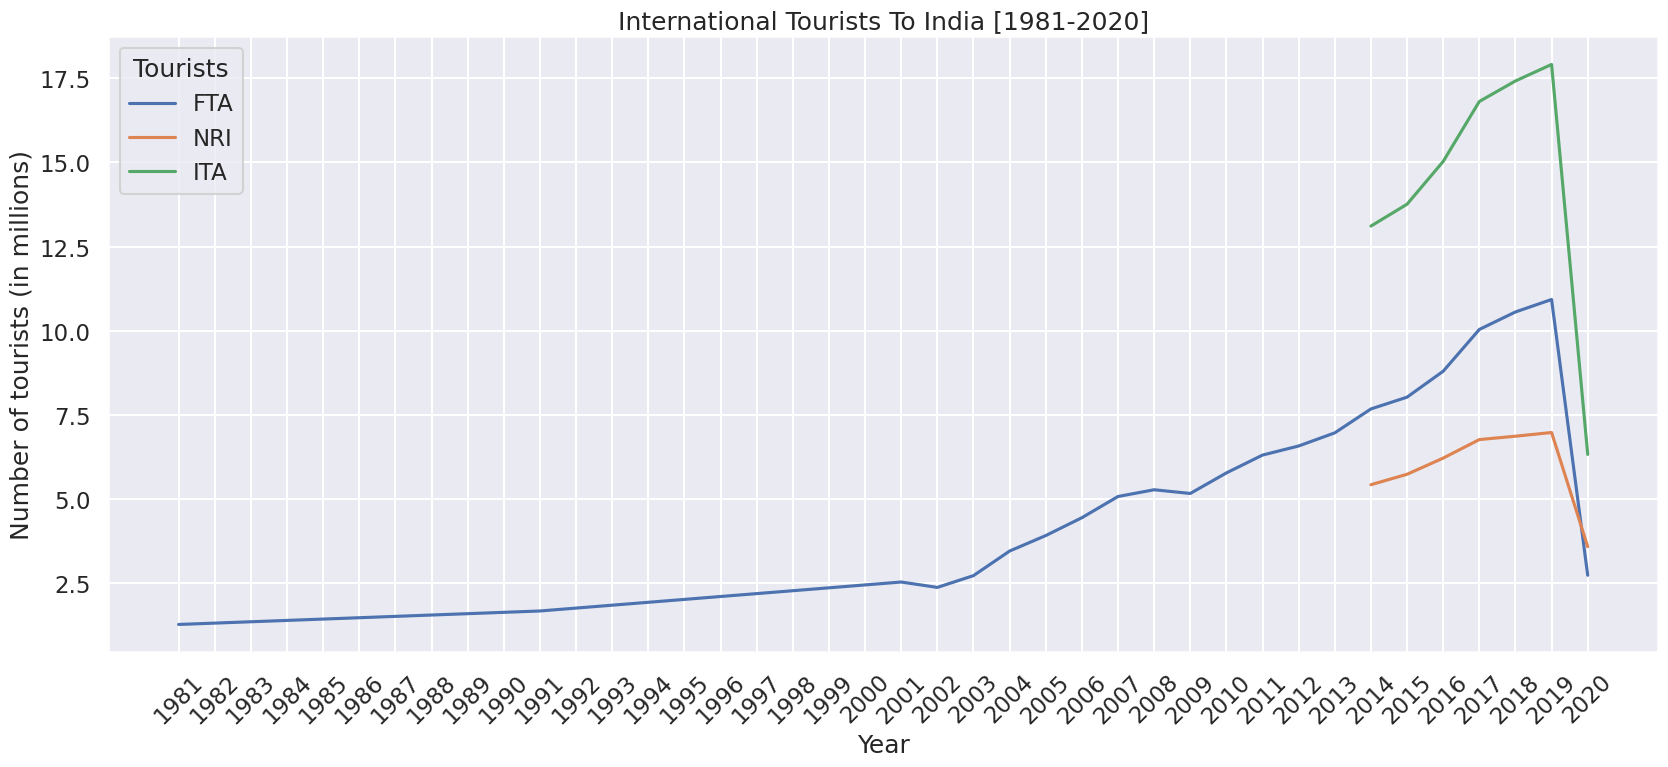

In [ ]:
# plotting df in a line graph
plt.figure(figsize=(20,8)) # setting figure size

sns.set_context("talk") #https://seaborn.pydata.org/generated/seaborn.set_context.html
g=sns.lineplot(x='Year', y='value', hue='Tourists', data=df)
g.set(xlabel="Year",ylabel="Number of tourists (in millions)", title="International Tourists To India [1981-2020]")
plt.xticks(
    range(1981,2021),
    rotation=45,
# horizontalalignment='right',
    fontweight='light'
)

plt.plot()

In [ ]:
# Fetching data from the csv file and renaming columns
quarterly=pd.read_csv("India-Tourism-Statistics-2001-2019-quaterly.csv").copy().rename(columns={
    '% Distribution by Quarter - 1st Quarter (Jan-Mar)':'1st Quarter',
    '% Distribution by Quarter - 2nd Quarter(Apr-June)':'2nd Quarter',
    '% Distribution by Quarter - 3rd Quarter (July-Sep)':'3rd Quarter',
    '% Distribution by Quarter - 4th Quarter (Oct-Dec)':'4th Quarter',
})
quarterly.head()

,Year,Arrivals,1st Quarter,2nd Quarter,3rd Quarter,4th Quarter
0,2001,2537282,31.3,20.2,23.0,25.5
1,2002,2384364,28.8,18.4,21.1,31.7
2,2003,2726214,27.7,17.6,22.8,31.9
3,2004,3457477,27.8,18.3,21.8,32.1
4,2005,3918610,28.3,18.4,21.4,31.9


In [ ]:
# Parsing the dataframe
tot_arrivals=quarterly[['Year','Arrivals']].copy()

# shifting the decimal place of the values in column 'Arrivals' 6 digits to the left
tot_arrivals["Arrivals"]=tot_arrivals['Arrivals']*(10**-6)
tot_arrivals=tot_arrivals.round(decimals=2) # rounding of to 2 places

tot_arrivals.head()

,Year,Arrivals
0,2001,2.54
1,2002,2.38
2,2003,2.73
3,2004,3.46
4,2005,3.92


<ipython-input-8-3fed62e2b224>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.barplot(x=tot_arrivals['Year'], y=tot_arrivals["Arrivals"], palette='viridis', label="Some Label")


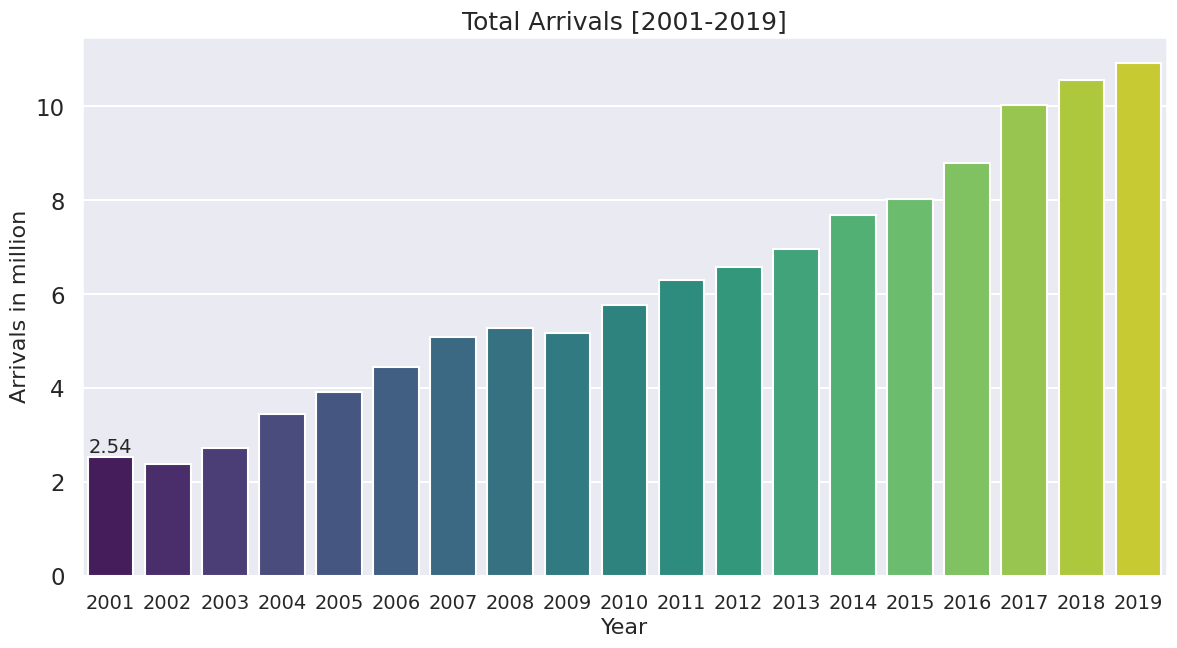

In [ ]:
# plotting the bar (column) graph
plt.figure(figsize=(14,7))

g=sns.barplot(x=tot_arrivals['Year'], y=tot_arrivals["Arrivals"], palette='viridis', label="Some Label")

plt.title("Total Arrivals [2001-2019]", fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Arrivals in million", fontsize=16)
plt.xticks(fontsize=14)

# can also set using:
# g.set(xlabel="Year",ylabel="Arrivals in million", title="Total Arrivals [2001-2019]")

g.bar_label(g.containers[0], fontsize=14) #labelling the bars with values

plt.show()

In [ ]:
#parsing the dataframe

quarterly2017=quarterly[quarterly['Year']==2017].copy()
quarterly2017=quarterly2017.drop(['Arrivals','Year'],axis=1) #axis=1 specifies columnwise

quarterly2018=quarterly[quarterly['Year']==2018].copy()
quarterly2018=quarterly2018.drop(['Arrivals','Year'],axis=1)

quarterly2019=quarterly[quarterly['Year']==2019].copy()
quarterly2019=quarterly2019.drop(['Arrivals','Year'],axis=1)

In [ ]:
quarterly2017.head()

,1st Quarter,2nd Quarter,3rd Quarter,4th Quarter
16,27.7,20.0,22.1,30.2


In [ ]:
quarterly2018.head()

,1st Quarter,2nd Quarter,3rd Quarter,4th Quarter
17,29.5,19.2,21.9,29.3


In [ ]:
quarterly2019.head()

,1st Quarter,2nd Quarter,3rd Quarter,4th Quarter
18,29.1,19.4,21.7,29.9


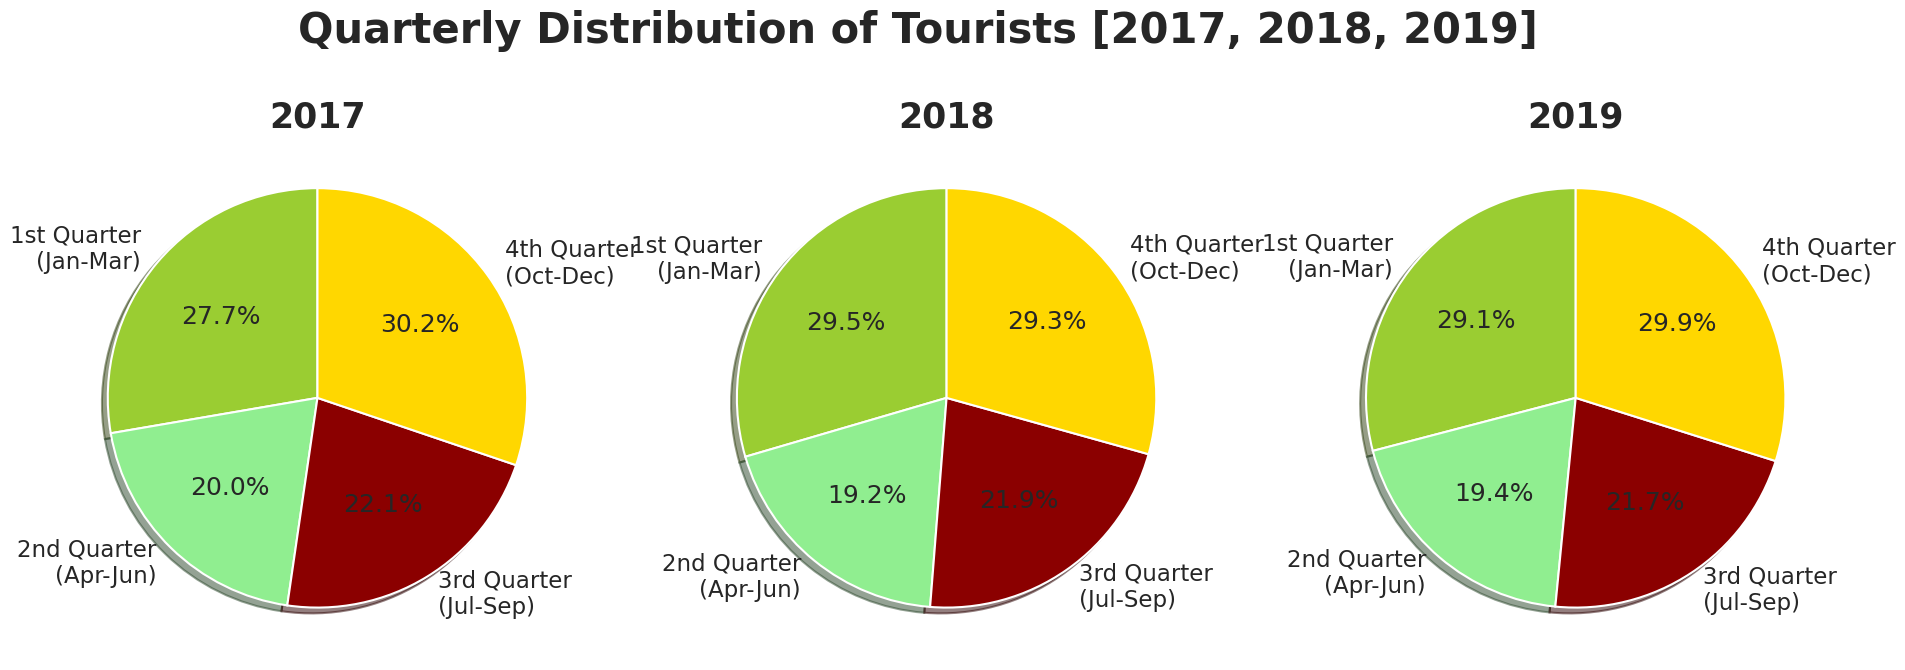

In [ ]:
# plotting subplots (pie charts)
fig, axes = plt.subplots(1,3, sharex=True, figsize=(23,8))
fig.suptitle('Quarterly Distribution of Tourists [2017, 2018, 2019]',fontsize=30,fontweight='bold')

quarter_labels=['1st Quarter\n(Jan-Mar)','2nd Quarter\n(Apr-Jun)','3rd Quarter\n(Jul-Sep)','4th Quarter\n(Oct-Dec)']

colors = ['yellowgreen', 'lightgreen', 'darkred', 'gold','darkgreen', 'red', 'lightsalmon']

# plotting data on chart
axes[0].pie(quarterly2017.loc[16,:].values.tolist(), labels=quarter_labels, colors=colors,
            autopct='%1.1f%%',shadow=True, startangle=90)
axes[0].set_title("2017",fontsize=25,fontweight='bold')

axes[1].pie(quarterly2018.loc[17,:].values.tolist(), labels=quarter_labels, colors=colors,
            autopct='%1.1f%%',shadow=True, startangle=90)
axes[1].set_title("2018",fontsize=25,fontweight='bold')

axes[2].pie(quarterly2019.loc[18,:].values.tolist(), labels=quarter_labels, colors=colors,
            autopct='%1.1f%%',shadow=True, startangle=90)
axes[2].set_title("2019",fontsize=25,fontweight='bold')
# plt.legend()

# handles, labels = plt.gca().get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper left')

# displaying chart
plt.show()

In [15]:
#fetching each quaterly data
quarter1=quarterly[['Year','1st Quarter']].copy()
quarter2=quarterly[['Year','2nd Quarter']].copy()
quarter3=quarterly[['Year','3rd Quarter']].copy()
quarter4=quarterly[['Year','4th Quarter']].copy()
quarter1.head()
quarter2.head()
quarter3.head()
quarter4.head()



,Year,4th Quarter
0,2001,25.5
1,2002,31.7
2,2003,31.9
3,2004,32.1
4,2005,31.9


In [16]:
# converting %ages to actual values
quarter1['1st Quarter']=quarter1['1st Quarter']*quarterly['Arrivals']/100
quarter2['2nd Quarter']=quarter2['2nd Quarter']*quarterly['Arrivals']/100
quarter3['3rd Quarter']=quarter3['3rd Quarter']*quarterly['Arrivals']/100
quarter4['4th Quarter']=quarter4['4th Quarter']*quarterly['Arrivals']/100

In [17]:
# Finding average %ages for each quarter from 2001 to 2019
sum_arrivals=quarterly['Arrivals'].sum()

average_percentage_quarter=[
    quarter1['1st Quarter'].sum()/sum_arrivals * 100,
    quarter2['2nd Quarter'].sum()/sum_arrivals * 100,
    quarter3['3rd Quarter'].sum()/sum_arrivals * 100,
    quarter4['4th Quarter'].sum()/sum_arrivals * 100,
]

average_percentage_quarter

[28.807179062028148, 19.187795324983707, 21.64875763359771, 30.349040603325218]

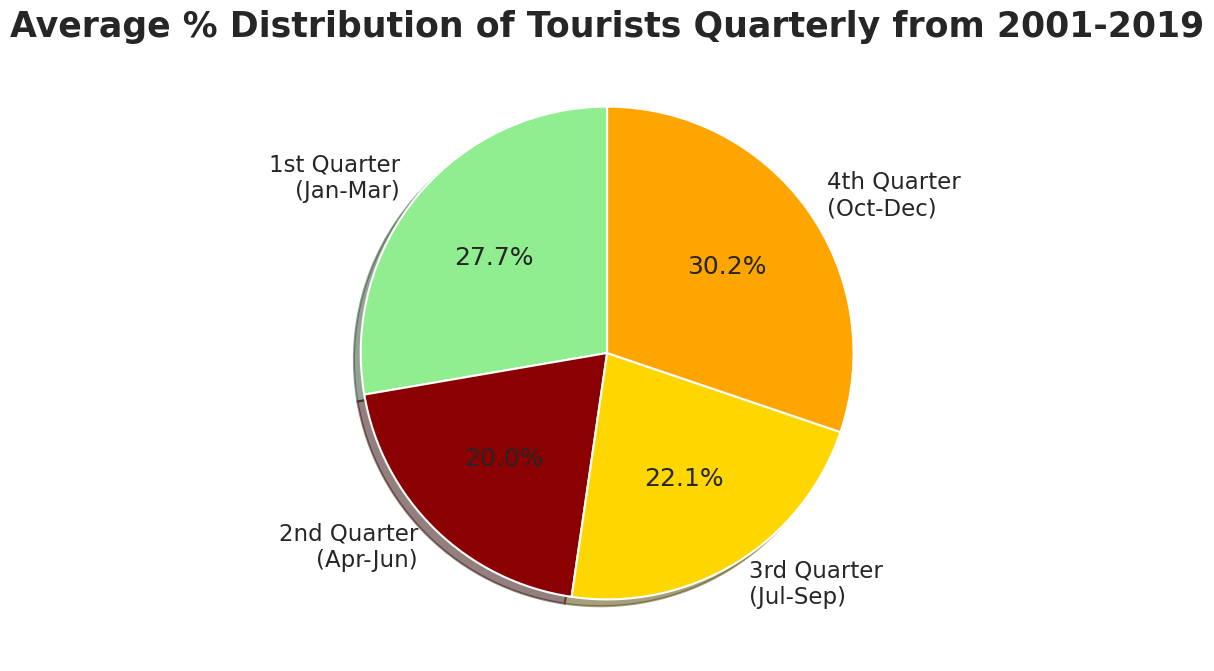

In [18]:

# plotting data on pie chart
colors = ['yellowgreen', 'lightgreen', 'darkred', 'gold','orange', 'red', 'lightsalmon']

plt.figure(figsize=(10,8))
plt.pie(quarterly2017.loc[16,:].values.tolist(), labels=quarter_labels, colors=colors[1:],
            autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Average % Distribution of Tourists Quarterly from 2001-2019",fontsize=25,fontweight='bold')

# displaying chart
plt.show()

Statistics of ITAs to India based on purpose 2019
Statistics of ITAs to India based on purpose 2019 [Regionwise]
Preparing the Dataset

In [20]:

# fetching data from csv file
country_and_reason=pd.read_csv("India-Tourism-Statistics-2019_region-and-reason.csv")
country_and_reason.head()

,Region,Country of Nationality,Arrivals (in numbers),Business and Professional(%),Leisure Holiday and Recreation(%),Medical(%),Indian Diaspora(%),Others(%)
0,North America,CANADA,351859,4.82,50.94,0.14,21.49,22.61
1,North America,UNITED STATES,1512032,11.24,38.56,0.08,29.48,20.64
2,North America,OTHERS,1,0.00,100.00,0.00,0.00,0.00
3,North America,Total,1863892,10.03,40.90,0.09,27.97,21.01
4,Central & South America,ARGENTINA,12844,14.69,78.60,0.08,1.25,5.38


In [22]:
# Parsing dataframe
regionwise_reason = country_and_reason[country_and_reason['Country of Nationality']=='Total'].copy()

# converting %ages to actual values and shifting the decimal places by 5 to the left
regionwise_reason['Business and Professional(%)']=regionwise_reason['Business and Professional(%)']*regionwise_reason['Arrivals (in numbers)']/100 * 10**-5
regionwise_reason['Leisure Holiday and Recreation(%)']=regionwise_reason['Leisure Holiday and Recreation(%)']*regionwise_reason['Arrivals (in numbers)']/100 * 10**-5
regionwise_reason['Medical(%)']=regionwise_reason['Medical(%)']*regionwise_reason['Arrivals (in numbers)']/100 * 10**-5
regionwise_reason['Indian Diaspora(%)']=regionwise_reason['Indian Diaspora(%)']*regionwise_reason['Arrivals (in numbers)']/100 * 10**-5
regionwise_reason['Others(%)']=regionwise_reason['Others(%)']*regionwise_reason['Arrivals (in numbers)']/100 * 10**-5

# Dropping columns
regionwise_reason.drop(['Arrivals (in numbers)','Country of Nationality'],axis=1,inplace=True)

# Renaming columns
regionwise_reason.rename(columns={
    'Business and Professional(%)':'Business and Professional',
    'Leisure Holiday and Recreation(%)':'Leisure Holiday and Recreation',
    'Medical(%)':'Medical',
    'Indian Diaspora(%)':'Indian Diaspora',
    'Others(%)':'Others'
},inplace=True)

# Resetting index
regionwise_reason.set_index('Region',inplace=True)

regionwise_reason.head()

,Business and Professional,Leisure Holiday and Recreation,Medical,Indian Diaspora,Others
Region,,,,,
North America,1.869484,7.623318,0.016775,5.213306,3.916037
Central & South America,0.200226,0.636193,0.001682,0.033437,0.117722
Western Europe,3.757811,9.951118,0.021784,4.406986,3.646710
Eastern Europe,0.566949,3.265209,0.235088,0.077145,0.420419
Africa,0.676429,1.128952,0.523897,0.272456,1.021346


Visualizing the Dataset


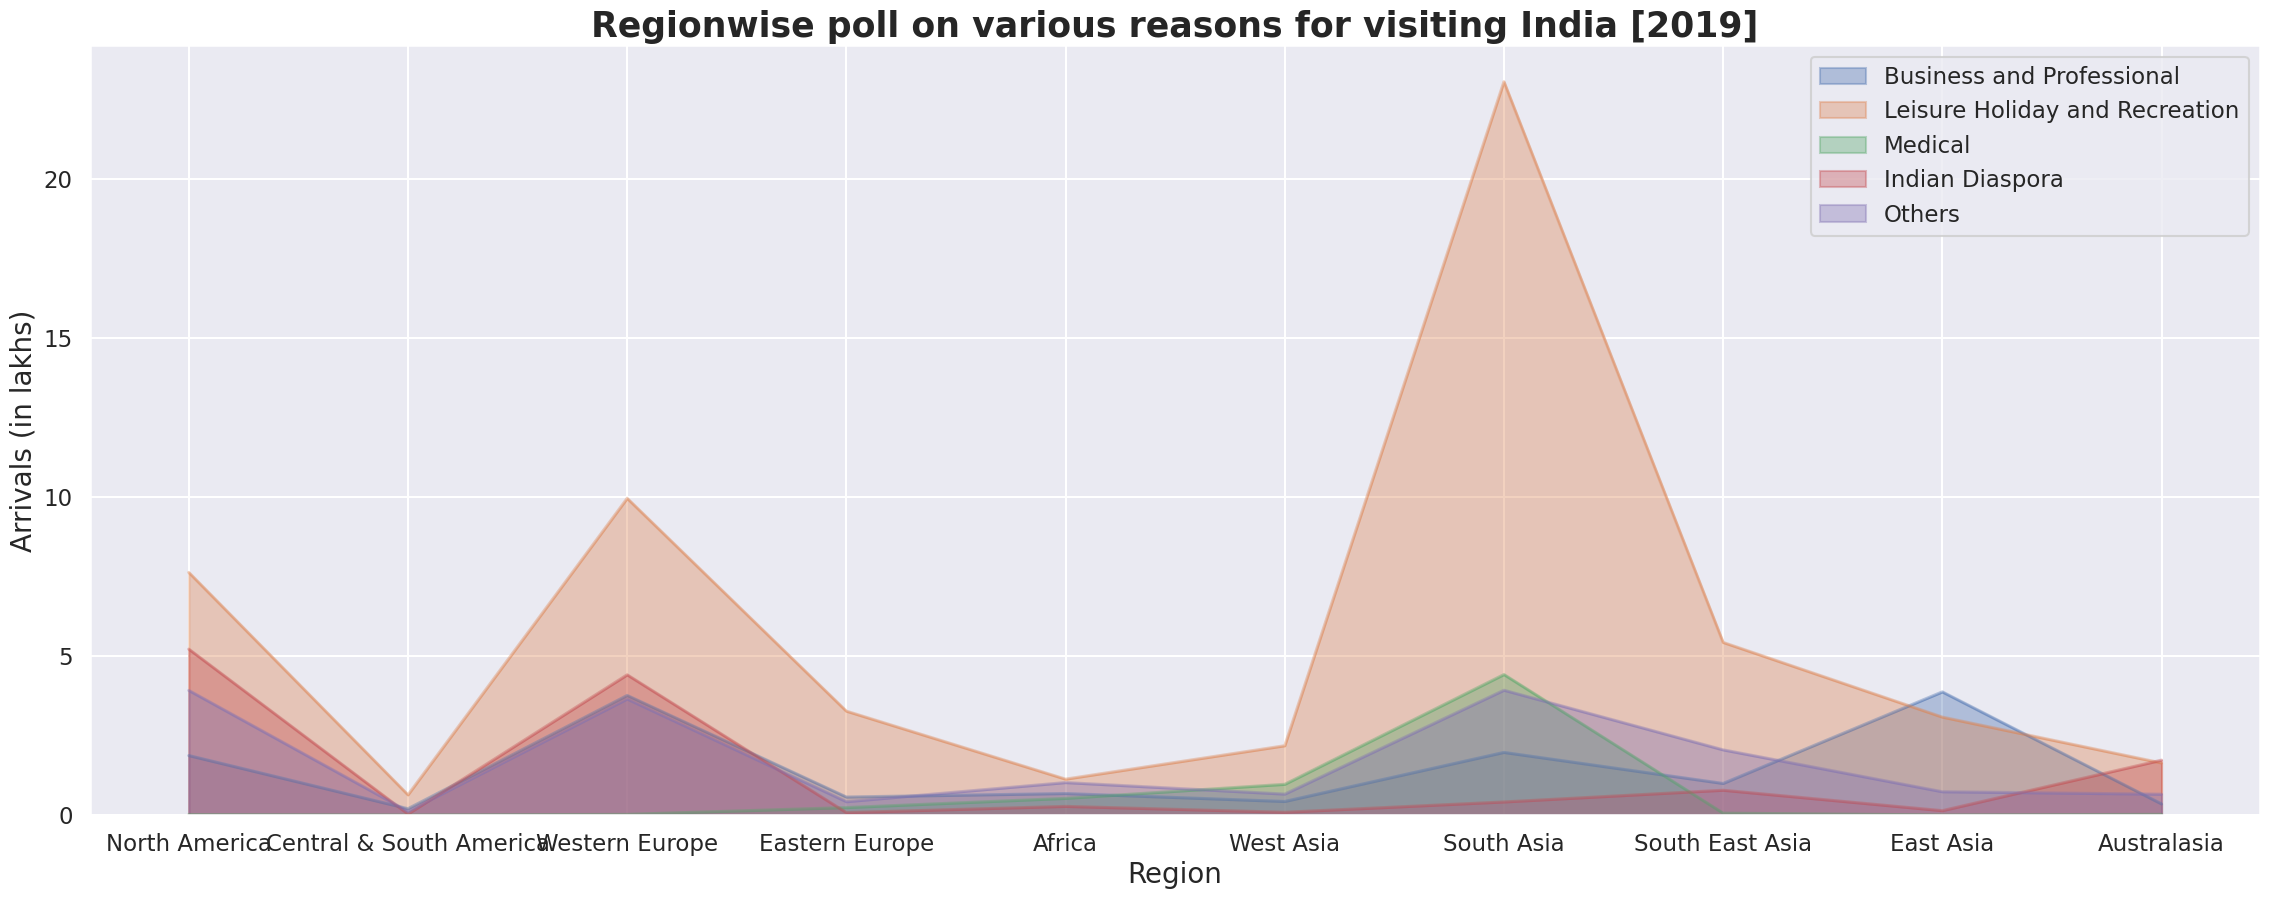

In [23]:
# plotting area graph
g=regionwise_reason.plot(kind = 'area',
              stacked = False,
              alpha = 0.37, # transparency coefficient, default 0.5, can set between 0 - 1
              figsize =(28,10),
             )

g.set_xticks(range(len(regionwise_reason.index)));
g.set_xticklabels(regionwise_reason.index);

plt.title('Regionwise poll on various reasons for visiting India [2019]',fontsize=25,fontweight='bold')
plt.xlabel('Region',fontsize=20)
plt.ylabel('Arrivals (in lakhs)',fontsize=20)
plt.xticks()

# displaying graph
plt.show()

In [25]:
# Parsing dataframe
countrywise=country_and_reason[country_and_reason['Country of Nationality'].isin(['Total','Grand Total','Not Classified Elsewhere','OTHERS'])==False].copy()
# Sorting w.r.t Arrivals in descending order
countrywise.sort_values(by=["Arrivals (in numbers)"],ascending=False, inplace = True)
# fetching 5 countries with top arrivals
countrywise=countrywise.iloc[0:5,:]
# dropping column 'Region'
countrywise.drop(["Region"],axis=1,inplace=True)

# Renaming columns
countrywise.rename(columns={
    'Business and Professional(%)':'Business and Professional',
    'Leisure Holiday and Recreation(%)':'Leisure Holiday and Recreation',
    'Medical(%)':'Medical',
    'Indian Diaspora(%)':'Indian Diaspora',
    'Others(%)':'Others'
},inplace=True)

# converting %ages to actual values and shifting the decimal places by 3 to the left
countrywise['Business and Professional']=countrywise['Business and Professional']*countrywise['Arrivals (in numbers)']/100 * 10**-3
countrywise['Leisure Holiday and Recreation']=countrywise['Leisure Holiday and Recreation']*countrywise['Arrivals (in numbers)']/100 * 10**-3
countrywise['Medical']=countrywise['Medical']*countrywise['Arrivals (in numbers)']/100* 10**-3
countrywise['Indian Diaspora']=countrywise['Indian Diaspora']*countrywise['Arrivals (in numbers)']/100* 10**-3
countrywise['Others']=countrywise['Others']*countrywise['Arrivals (in numbers)']/100* 10**-3

# dropping column
countrywise.drop(["Arrivals (in numbers)"],axis=1,inplace=True)

countrywise.head()


,Country of Nationality,Business and Professional,Leisure Holiday and Recreation,Medical,Indian Diaspora,Others
55,BANGLADESH,108.522307,1994.129607,396.969958,20.364043,57.741085
1,UNITED STATES,169.952397,583.039539,1.209626,445.747034,312.083405
24,UNITED KINGDOM,107.931507,405.418348,1.000292,302.688359,183.153465
78,AUSTRALIA,29.893417,132.904518,0.367241,154.645185,49.430639
0,CANADA,16.959604,179.236975,0.492603,75.614499,79.555320


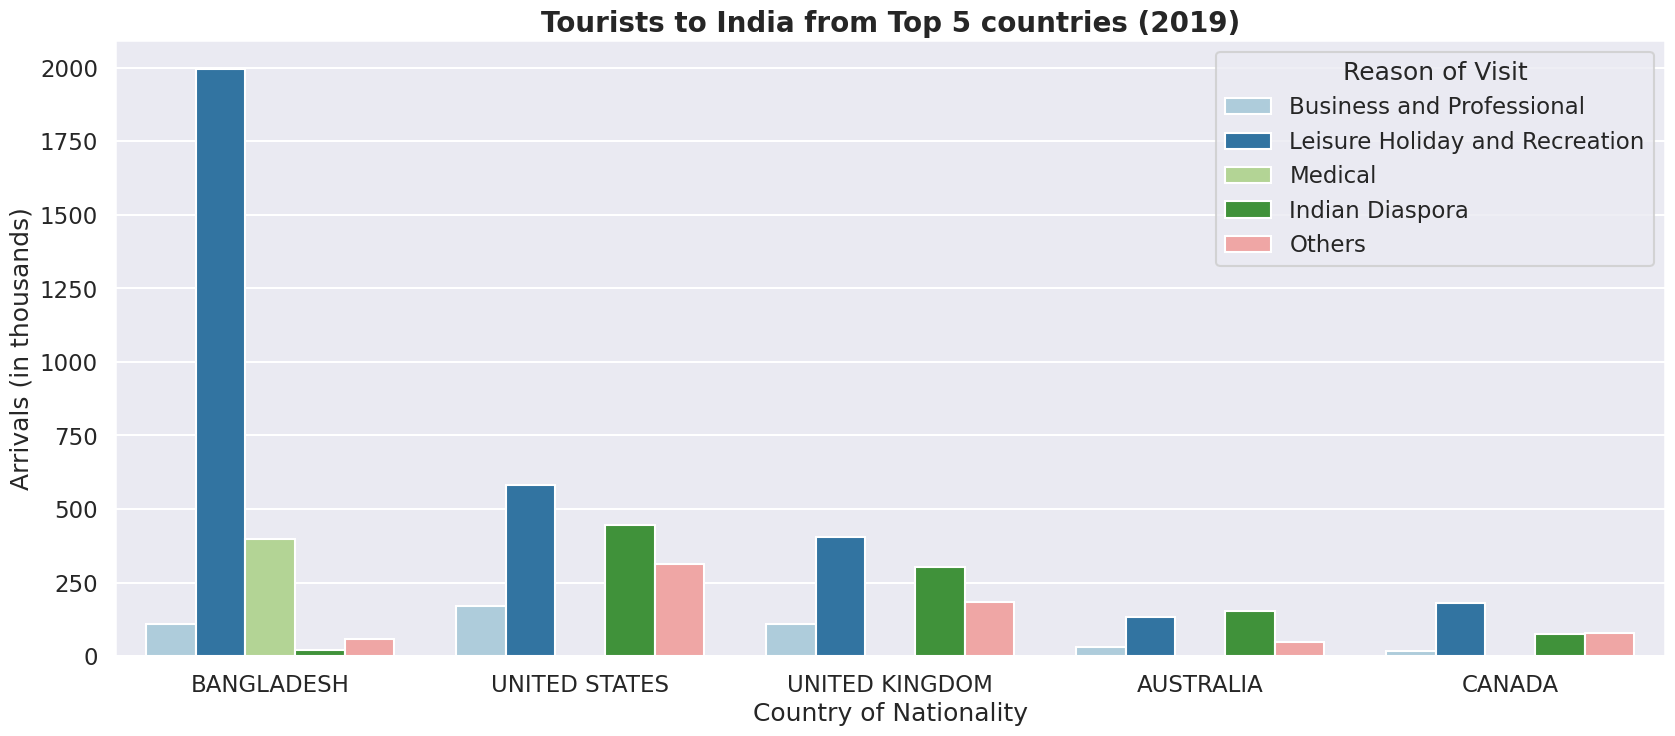

In [26]:

# Combining columns w.r.t nationality into a single column 'value' and column 'variable' will distinguish these values
df=pd.melt(countrywise,['Country of Nationality']).rename(columns={"variable":"Reason of Visit"})

# plotting bar (multicolumn) graph
plt.figure(figsize=(20,8))
# country v / s reason barplot
sns.barplot(x ='Country of Nationality',y='value', hue="Reason of Visit",data = df, palette='Paired')

plt.ylabel("Arrivals (in thousands)",fontsize=18)
plt.xlabel('Country of Nationality',fontsize=18)
plt.title("Tourists to India from Top 5 countries (2019)",fontsize=20,fontweight='bold')

# Show the plot
plt.show()

Average Distribution of Tourists to India based on the purpose of visit - 2019


Preparing the Dataset and Visualizing it


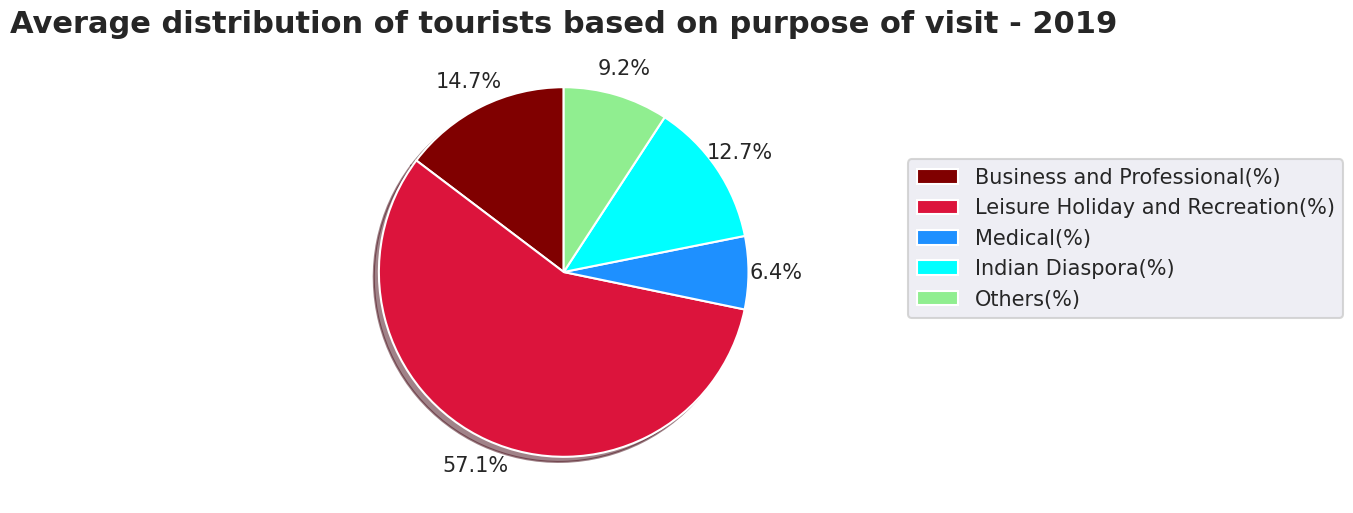

In [27]:
# fetching the grand total information
grand_total=country_and_reason[country_and_reason['Country of Nationality']=='Grand Total'].copy()

reason_list=['Business and Professional(%)','Leisure Holiday and Recreation(%)','Medical(%)','Indian Diaspora(%)','Others(%)']
colors = ['maroon', 'crimson', 'dodgerblue', 'aqua', 'lightgreen']

# plotting data on pie chart
plt.figure(figsize=(8,6))

pie=plt.pie(grand_total.loc[83,:].values.tolist()[3:], colors=colors,
            autopct='%1.1f%%',shadow=True, startangle=90,textprops={'fontsize': 15},pctdistance = 1.15,)
# plt.legend()
plt.legend(pie[0],reason_list, bbox_to_anchor=(1.5,0.7), loc="upper right", fontsize=15,
           bbox_transform=plt.gcf().transFigure)

plt.title("Average distribution of tourists based on purpose of visit - 2019",fontsize=22,fontweight='bold')

# displaying chart
plt.show()

Contribution Statistics to the Share Market of Indian Tourism [2017 - 2019]

Contribution to the Share Market of Indian Tourism regionwise [2017 - 2019]

Preparing the Dataset

In [28]:
# fetching data from csv file
country_and_share=pd.read_csv("India-Tourism-Statistics-region-2017-2019.csv")
country_and_share.head()

,Region,Country of Nationality,Number of Arrivals - 2017,Number of Arrivals - 2018,Number of Arrivals - 2019,Percentage Share - 2017,Percentage Share - 2018,Percentage Share - 2019,Percentage Change - 2018/17,Percentage Change - 2019/18
0,North America,Canada,335439.0,351040.0,351859,3.34,3.32,3.22,4.7,0.2
1,North America,U.S.A,1376919.0,1456678.0,1512032,13.72,13.80,13.83,5.8,3.8
2,North America,Others,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
3,North America,Total,1712358.0,1807718.0,1863892,17.06,17.12,17.05,5.6,3.1
4,Central and South America,Argentina,14875.0,16345.0,12844,0.15,0.15,0.12,9.9,-21.4


In [29]:
# Parsing, and setting the index of the dataframe
regionwise_share=country_and_share[country_and_share['Country of Nationality']=='Total'].copy()
regionwise_share=regionwise_share[['Region','Percentage Share - 2017','Percentage Share - 2018','Percentage Share - 2019']]
regionwise_share.set_index('Region',inplace=True)
regionwise_share.head()

,Percentage Share - 2017,Percentage Share - 2018,Percentage Share - 2019
Region,,,
North America,17.06,17.12,17.05
Central and South America,0.92,0.96,0.91
Western Europe,21.26,21.25,19.93
Eastern Europe,4.71,4.41,4.18
Africa,3.17,3.33,3.31


**Viusalizing thee DataSet**

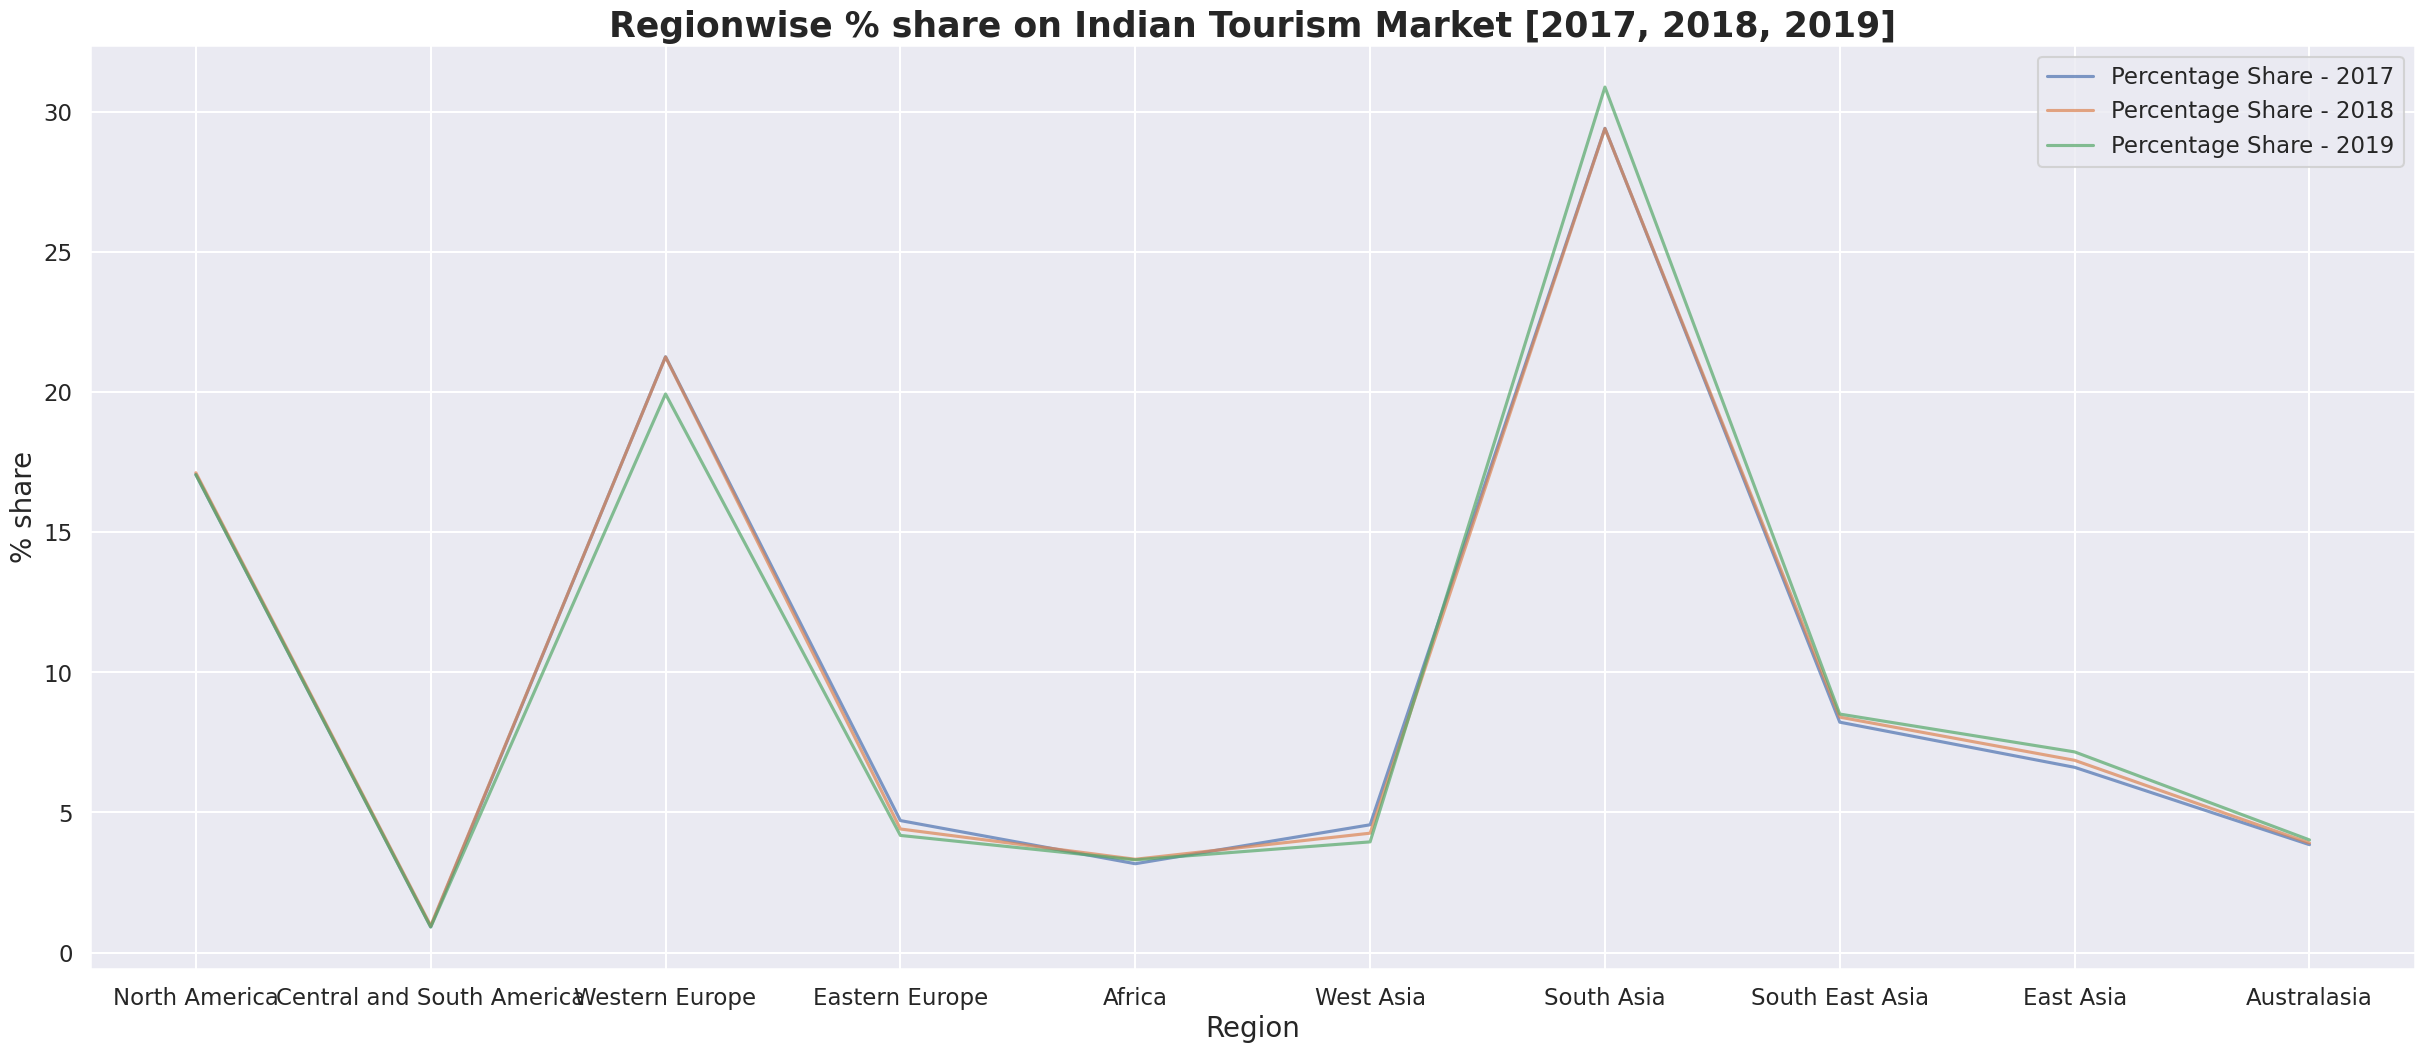

In [31]:
# plotting the line graph
g=regionwise_share.plot(kind = 'line',
              stacked = False,
              alpha = 0.7, # transparency coefficient, default 0.5, can set between 0 - 1
              figsize =(30,12),
             )

g.set_xticks(range(len(regionwise_share.index)));
g.set_xticklabels(regionwise_share.index);
i=0
plt.title('Regionwise % share on Indian Tourism Market [2017, 2018, 2019]',fontsize=25,fontweight='bold')
plt.xlabel('Region',fontsize=20)
plt.ylabel('% share',fontsize=20)
plt.xticks()

plt.show()

**Contribution to the Indian Tourism Share Market countrywise [2017 - 2019]**

In [32]:
# obtaining 6 countries with highest shares during 2017

# Parsing dataframe
highest_countrywise_2017=country_and_share[country_and_share['Country of Nationality'].isin(
    ['Total','Grand Total','Not Classified elsewhere','Others'])==False].copy()
highest_countrywise_2017=highest_countrywise_2017[['Country of Nationality','Percentage Share - 2017']]
# sorting w.r.t % share-2017 in descending order
highest_countrywise_2017.sort_values(by=['Percentage Share - 2017'],ascending=False,inplace=True)
# fetching top 6 countries with highest share contributions
highest_countrywise_2017=highest_countrywise_2017.iloc[0:6,:]

# %age share values sum of 2017
perc_sum=highest_countrywise_2017['Percentage Share - 2017'].sum()

# Accumulating the total %age share by the rest of the countries
highest_countrywise_2017=pd.concat(
    [highest_countrywise_2017,pd.DataFrame.from_records([{'Country of Nationality':'Others','Percentage Share - 2017':(100-perc_sum)}])],
    ignore_index=True)


# obtaining 6 countries with highest shares during 2018

# Parsing dataframe
highest_countrywise_2018=country_and_share[country_and_share['Country of Nationality'].isin(
    ['Total','Grand Total','Not Classified elsewhere','Others'])==False].copy()
highest_countrywise_2018=highest_countrywise_2018[['Country of Nationality','Percentage Share - 2018']]
# sorting w.r.t % share-2018 in descending order
highest_countrywise_2018.sort_values(by=['Percentage Share - 2018'],ascending=False,inplace=True)
# fetching top 6 countries with highest share contributions
highest_countrywise_2018=highest_countrywise_2018.iloc[0:6,:]

# %age share values sum of 2018
perc_sum=highest_countrywise_2018['Percentage Share - 2018'].sum()

# Accumulating the total %age share by the rest of the countries
highest_countrywise_2018=pd.concat(
    [highest_countrywise_2018,pd.DataFrame.from_records([{'Country of Nationality':'Others','Percentage Share - 2018':(100-perc_sum)}])],
    ignore_index=True)


# obtaining 6 countries with highest shares during 2019

# Parsing dataframe
highest_countrywise_2019=country_and_share[country_and_share['Country of Nationality'].isin(
    ['Total','Grand Total','Not Classified elsewhere','Others'])==False].copy()
highest_countrywise_2019=highest_countrywise_2019[['Country of Nationality','Percentage Share - 2019']]
# sorting w.r.t % share-2019 in descending order
highest_countrywise_2019.sort_values(by=['Percentage Share - 2019'],ascending=False,inplace=True)
# fetching top 6 countries with highest share contributions
highest_countrywise_2019=highest_countrywise_2019.iloc[0:6,:]

# %age share values sum of 2019
perc_sum=highest_countrywise_2019['Percentage Share - 2019'].sum()

# Accumulating the total %age share by the rest of the countries
highest_countrywise_2019=pd.concat(
    [highest_countrywise_2019,pd.DataFrame.from_records([{'Country of Nationality':'Others','Percentage Share - 2019':(100-perc_sum)}])],
    ignore_index=True)

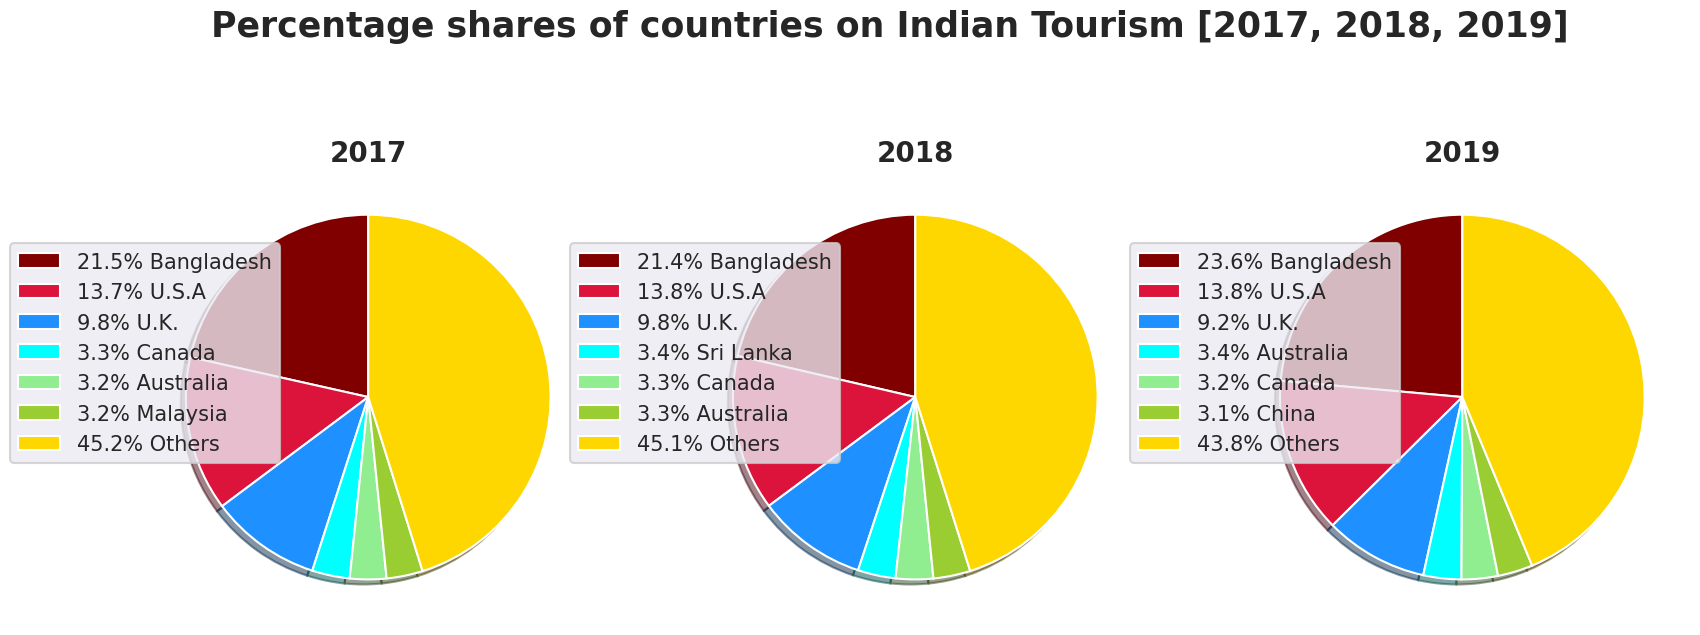

In [33]:
# plotting subplots (pie charts)
fig, axes = plt.subplots(1,3, sharex=True, figsize=(20,8))
fig.suptitle('Percentage shares of countries on Indian Tourism [2017, 2018, 2019]',fontsize=25,fontweight='bold')

# plotting data on chart

colors = ['maroon', 'crimson', 'dodgerblue', 'aqua', 'lightgreen','yellowgreen', 'gold']

#2017

pie=axes[0].pie(highest_countrywise_2017['Percentage Share - 2017'], colors=colors, shadow=True, startangle=90)
percents=highest_countrywise_2017['Percentage Share - 2017']*100/highest_countrywise_2017['Percentage Share - 2017'].sum()
axes[0].legend(
    pie[0],[f'{p:.1f}% {l}'  for p ,l in zip(percents, highest_countrywise_2017['Country of Nationality'])],
    bbox_to_anchor=(0.2,0.7),
    loc="upper right", fontsize=15,
    bbox_transform=plt.gcf().transFigure)
axes[0].set_title("2017",fontsize=20,fontweight='bold')

#2018

pie=axes[1].pie(highest_countrywise_2018['Percentage Share - 2018'], colors=colors, shadow=True, startangle=90)
percents=highest_countrywise_2018['Percentage Share - 2018']*100/highest_countrywise_2018['Percentage Share - 2018'].sum()
axes[1].legend(
    pie[0],[f'{p:.1f}% {l}'  for p ,l in zip(percents, highest_countrywise_2018['Country of Nationality'])],
    bbox_to_anchor=(0.48,0.7),
    loc="upper right", fontsize=15,
    bbox_transform=plt.gcf().transFigure)
axes[1].set_title("2018",fontsize=20,fontweight='bold')

#2019

pie=axes[2].pie(highest_countrywise_2019['Percentage Share - 2019'],  colors=colors, shadow=True, startangle=90)
percents=highest_countrywise_2019['Percentage Share - 2019']*100/highest_countrywise_2019['Percentage Share - 2019'].sum()
axes[2].legend(
    pie[0],[f'{p:.1f}% {l}'  for p ,l in zip(percents, highest_countrywise_2019['Country of Nationality'])],
    bbox_to_anchor=(0.76,0.7),
    loc="upper right", fontsize=15,
    bbox_transform=plt.gcf().transFigure)
axes[2].set_title("2019",fontsize=20,fontweight='bold')
# plt.legend()

# handles, labels = plt.gca().get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper left')

# displaying chart
plt.show()

 **Tourist segregation based on age [2001 - 2019]**

FTAs segregated based on age [2001 - 2019]

Preparing the Dataset

In [34]:
# fetching data from the csv file
agegroup=pd.read_csv("India-Tourism-Statistics-2001-2019-agegroup.csv")
agegroup.head()

,Year,FTAs,% distribution by Age-Group (in Year) - 0-14,% distribution by Age-Group (in Year) - 15-24,% distribution by Age-Group (in Year) - 25-34,% distribution by Age-Group (in Year) - 35-44,% distribution by Age-Group (in Year) - 45-54,% distribution by Age-Group (in Year) - 55-64,% distribution by Age-Group (in Year) - 65 and above,% distribution by Age-Group (in Year) - Not Reported
0,2001,2537282,7.0,10.8,20.1,21.1,19.4,11.9,6.7,3.0
1,2002,2384364,9.2,10.0,19.4,21.6,19.4,11.5,7.7,1.2
2,2003,2726214,7.2,10.0,19.5,21.6,19.4,11.5,7.7,3.1
3,2004,3457477,8.5,9.8,18.8,21.3,19.4,12.8,8.2,0.2
4,2005,3918610,8.6,9.6,18.8,21.3,19.5,13.0,8.7,0.5


In [35]:
# Renaming the columns
agegroup_elaborate=agegroup.copy().rename(columns={
    '% distribution by Age-Group (in Year) - 0-14':'0-14',
    '% distribution by Age-Group (in Year) - 15-24':'15-24',
    '% distribution by Age-Group (in Year) - 25-34':'25-34',
    '% distribution by Age-Group (in Year) - 35-44':'35-44',
    '% distribution by Age-Group (in Year) - 45-54':'45-54',
    '% distribution by Age-Group (in Year) - 55-64':'55-64',
    '% distribution by Age-Group (in Year) - 65 and above':'65 and above',
    '% distribution by Age-Group (in Year) - Not Reported':'Not Reported',
})

# converting %ages to actual values and shifting the decimal places by 3 to the left
agegroup_elaborate['0-14']=agegroup_elaborate['0-14']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['15-24']=agegroup_elaborate['15-24']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['25-34']=agegroup_elaborate['25-34']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['35-44']=agegroup_elaborate['35-44']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['45-54']=agegroup_elaborate['45-54']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['55-64']=agegroup_elaborate['55-64']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['65 and above']=agegroup_elaborate['65 and above']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['Not Reported']=agegroup_elaborate['Not Reported']*agegroup_elaborate['FTAs']/100 * 10**-3

agegroup_elaborate.head()

,Year,FTAs,0-14,15-24,25-34,35-44,45-54,55-64,65 and above,Not Reported
0,2001,2537282,177.609740,274.026456,509.993682,535.366502,492.232708,301.936558,169.997894,76.118460
1,2002,2384364,219.361488,238.436400,462.566616,515.022624,462.566616,274.201860,183.596028,28.612368
2,2003,2726214,196.287408,272.621400,531.611730,588.862224,528.885516,313.514610,209.918478,84.512634
3,2004,3457477,293.885545,338.832746,650.005676,736.442601,670.750538,442.557056,283.513114,6.914954
4,2005,3918610,337.000460,376.186560,736.698680,834.663930,764.128950,509.419300,340.919070,19.593050


**Visualizing the Dataset**

[]

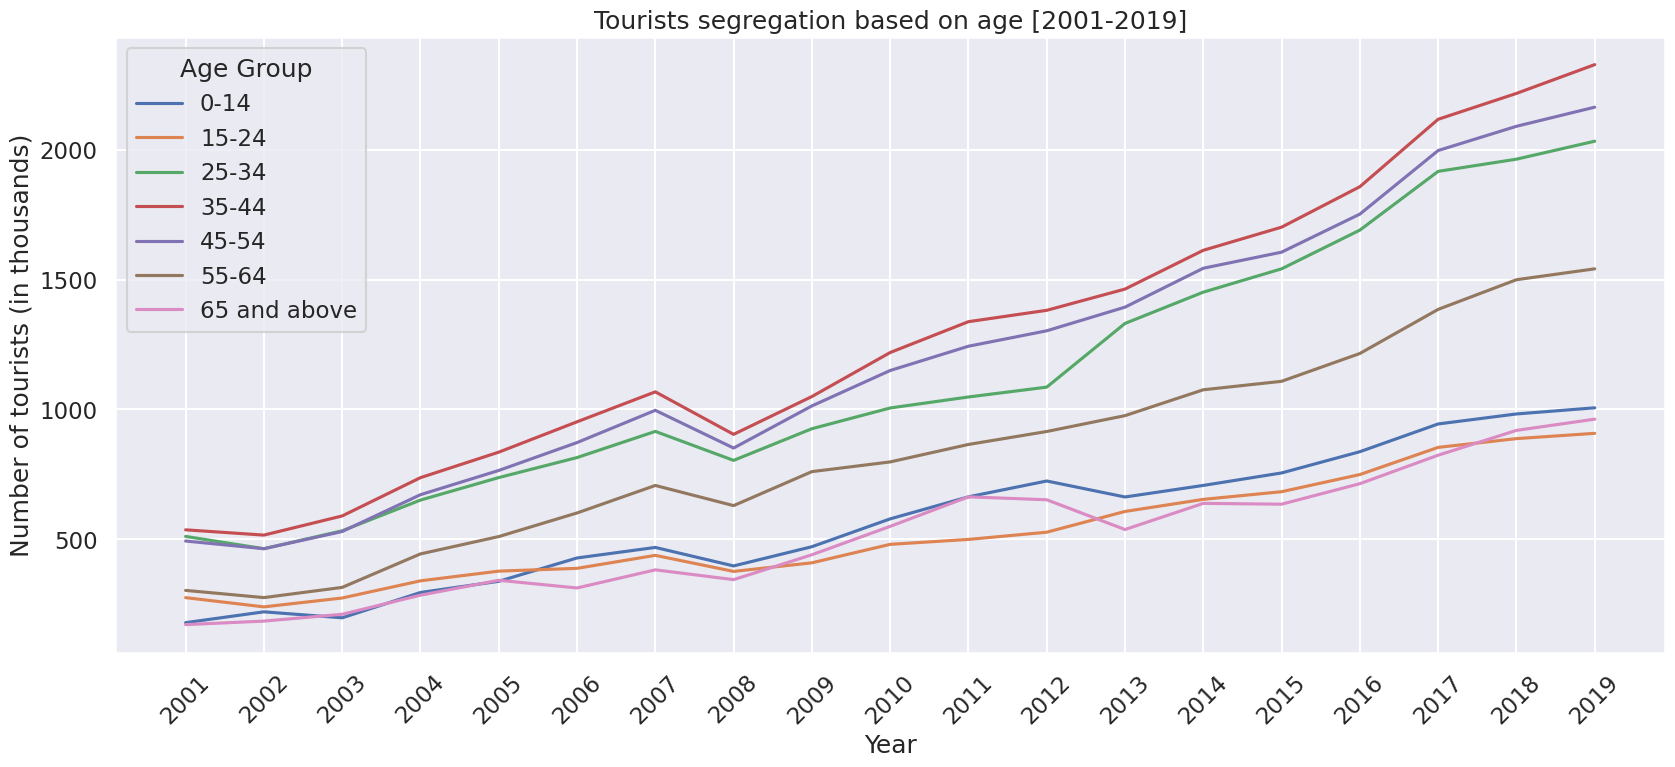

In [36]:
# dropping columns
agegroup_elaborate.drop(['FTAs','Not Reported'],axis=1 ,inplace=True)
# Combining columns w.r.t 'Year' into a single column 'value' and column 'variable' will distinguish these values
df=pd.melt(agegroup_elaborate,['Year']).rename(columns={"variable":"Age Group"})

# plotting the multiline graph
plt.figure(figsize=(20,8))

sns.set_context("talk")

g=sns.lineplot(x='Year', y='value', hue='Age Group', data=df)
g.set(xlabel="Year",ylabel="Number of tourists (in thousands)", title="Tourists segregation based on age [2001-2019]")
plt.xticks(
    range(2001,2020),
    rotation=45,
#     horizontalalignment='right',
    fontweight='light'
)

# display the chart
plt.plot()

**Average %age distribution of Tourists based on age [2001 - 2019]**

Preparing the Dataset

In [37]:
# finding average %ages for each agegroup from their actual values
tot_fta=agegroup['FTAs'].sum()

# 10**5 (100 * 10**3) since distribution among agegroups was converted to thousands previously
avg_agegroup_pctg=[
    agegroup_elaborate['0-14'].sum()*10**5/tot_fta,
    agegroup_elaborate['15-24'].sum()*10**5/tot_fta,
    agegroup_elaborate['25-34'].sum()*10**5/tot_fta,
    agegroup_elaborate['35-44'].sum()*10**5/tot_fta,
    agegroup_elaborate['45-54'].sum()*10**5/tot_fta,
    agegroup_elaborate['55-64'].sum()*10**5/tot_fta,
    agegroup_elaborate['65 and above'].sum()*10**5/tot_fta
]

print(avg_agegroup_pctg)

[9.290327244694959, 8.526830283828492, 18.353340597195853, 20.92885960109853, 19.620265319294138, 13.637821302553538, 8.356931097199208]


 *Visualizing the Dataset*

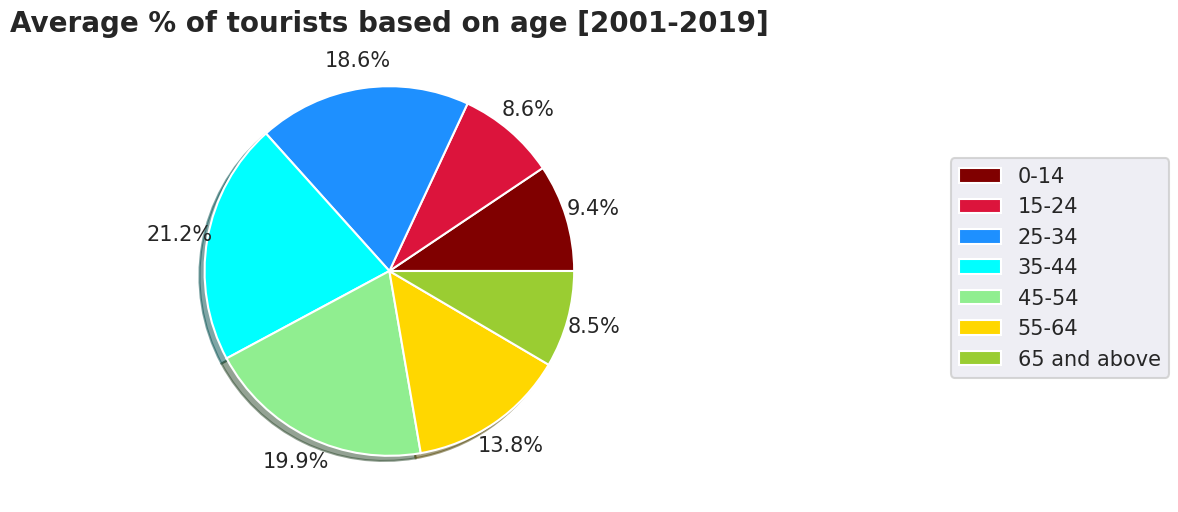

In [38]:
colors = ['maroon', 'crimson', 'dodgerblue', 'aqua', 'lightgreen','gold','yellowgreen']
agegroup_list=['0-14','15-24','25-34','35-44','45-54','55-64','65 and above']

# plotting data on chart
plt.figure(figsize=(8,6))

pie=plt.pie(avg_agegroup_pctg, colors=colors,
            autopct='%1.1f%%',shadow=True, startangle=0,textprops={'fontsize': 15},pctdistance = 1.15,)
# plt.legend()
plt.legend(pie[0],agegroup_list, bbox_to_anchor=(1.5,0.7), loc="upper right", fontsize=15,
           bbox_transform=plt.gcf().transFigure)

plt.title("Average % of tourists based on age [2001-2019]",fontsize=20,fontweight='bold')

# displaying chart
plt.show()

Indian Tourism Statewise Statistics [2019 - 2020]

Foreign tourists per State/UTs [2019 - 2020]

Preparing the Dataset

In [39]:

# fetching data from the csv file
statewise_data=pd.read_csv("India-Tourism-Statistics-statewise_2019-2020_domestic_foreign.csv")
statewise_data.head()

,S. No.,States/UTs,Domestic -2019,Foreign - 2019,Domestic -2020,Foreign - 2020,Growth rate - DTV 2020/19,Growth rate - FTV 2020/19
0,1,A&N Island,505398,16206,191207,5412,-62.17,-66.6
1,2,Andhra Pradesh,237051508,280356,70828590,67591,-70.12,-75.89
2,3,Arunachal Pradesh,555639,7825,42871,961,-92.28,-87.72
3,4,Assam,5447805,26878,1266898,7285,-76.74,-72.9
4,5,Bihar,33990038,1093141,5638024,308080,-83.41,-71.82


In [40]:
# Parsing dataframe
foreign_statewise=statewise_data[['States/UTs','Foreign - 2019','Foreign - 2020']].copy()
# sorting by Foreign-2019 in descending order
foreign_statewise.sort_values(by=['Foreign - 2019'], ascending=False, inplace=True)
foreign_statewise=foreign_statewise[foreign_statewise['States/UTs'].isin(['Grand Total'])==False]

# shifting the decimal places by 5 to the left
foreign_statewise['Foreign - 2019']=foreign_statewise['Foreign - 2019'] * 10**-5
foreign_statewise['Foreign - 2020']=foreign_statewise['Foreign - 2020'] * 10**-5

foreign_statewise.head()

,States/UTs,Foreign - 2019,Foreign - 2020
31,Tamil Nadu,68.66327,12.28323
21,Maharashtra,55.28704,12.62409
34,Uttar Pradesh,47.45181,8.90932
9,Delhi,29.83436,6.81230
36,West Bengal,16.56145,4.63285


Visualizing the Dataset

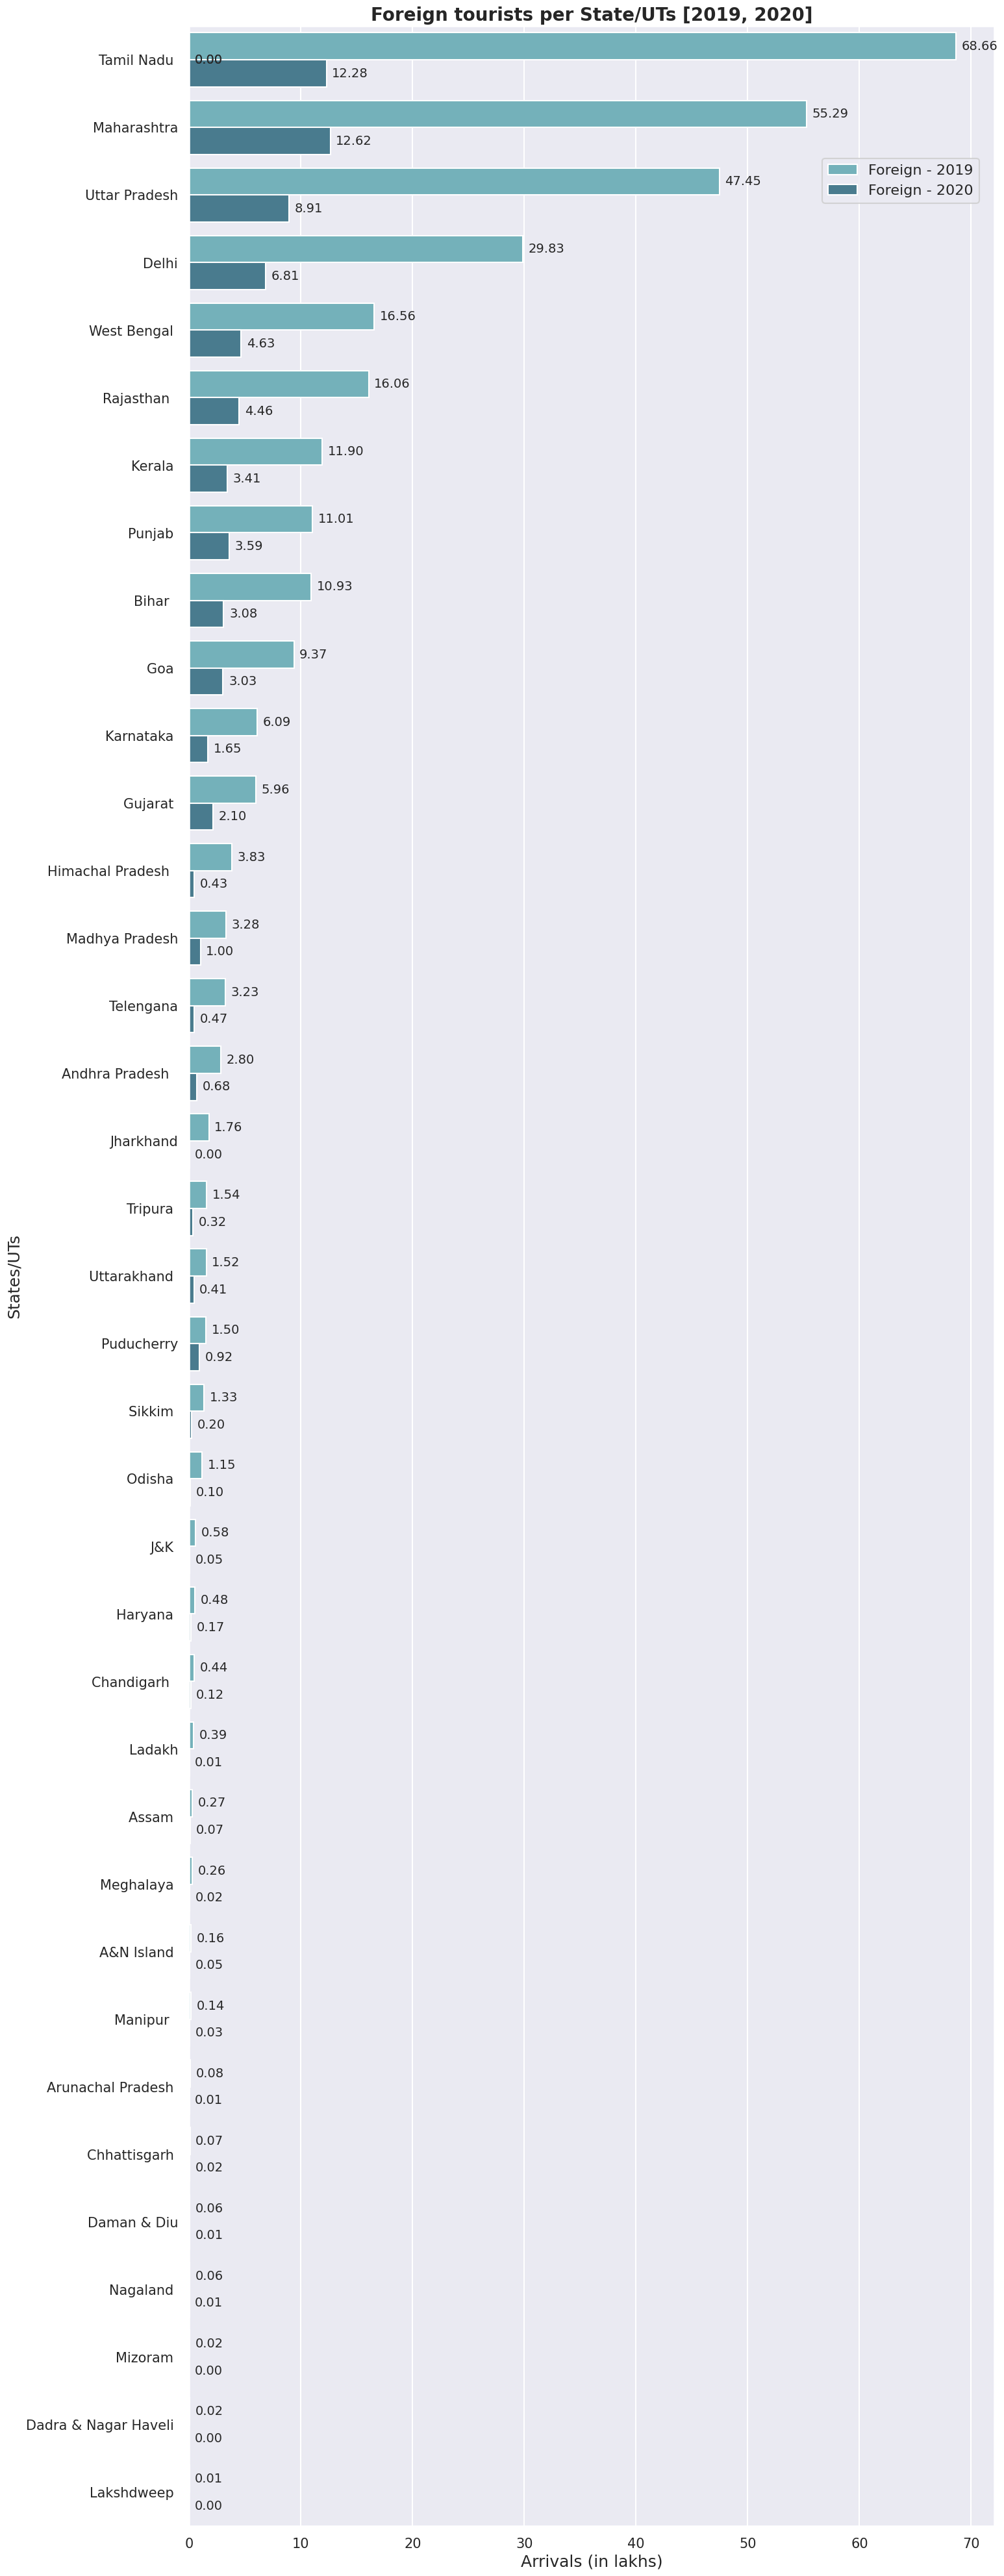

In [41]:
# Combining columns w.r.t 'States/UTs' into a single column 'value' and column 'variable' will distinguish these values
df=pd.melt(foreign_statewise,['States/UTs']).rename(columns={"variable":"Year"})

# plotting data on horizontal bar graph
plt.figure(figsize=(16,50))
ax = sns.barplot(x="value", y="States/UTs", data=df, hue='Year', palette='GnBu_d')

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 0.5,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center',  # vertical alignment
            fontsize=14)

plt.title("Foreign tourists per State/UTs [2019, 2020]", fontsize=20, fontweight='bold')
plt.xlabel("Arrivals (in lakhs)", fontsize=18)
plt.ylabel("States/UTs", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(bbox_to_anchor=(0.99,0.95), prop={'size': 16})

# display the chart
plt.show()

Domestic tourists per State/UTs [2019 - 2020]

Preparing the Dataset


In [42]:
# Parsing dataframe
domestic_statewise=statewise_data[['States/UTs','Domestic -2019','Domestic -2020']].copy()
# sorting by Domestic-2019 in descending order
domestic_statewise.sort_values(by=['Domestic -2019'], ascending=False, inplace=True)
domestic_statewise=domestic_statewise[domestic_statewise['States/UTs'].isin(['Grand Total'])==False]

# shifting the decimal places by 5 to the left
domestic_statewise['Domestic -2019']=domestic_statewise['Domestic -2019'] * 10**-5
domestic_statewise['Domestic -2020']=domestic_statewise['Domestic -2020'] * 10**-5

domestic_statewise.head()

,States/UTs,Domestic -2019,Domestic -2020
34,Uttar Pradesh,5358.55162,861.22293
31,Tamil Nadu,4948.65257,1406.51241
1,Andhra Pradesh,2370.51508,708.28590
16,Karnataka,2279.34714,774.53339
21,Maharashtra,1492.94703,392.34591


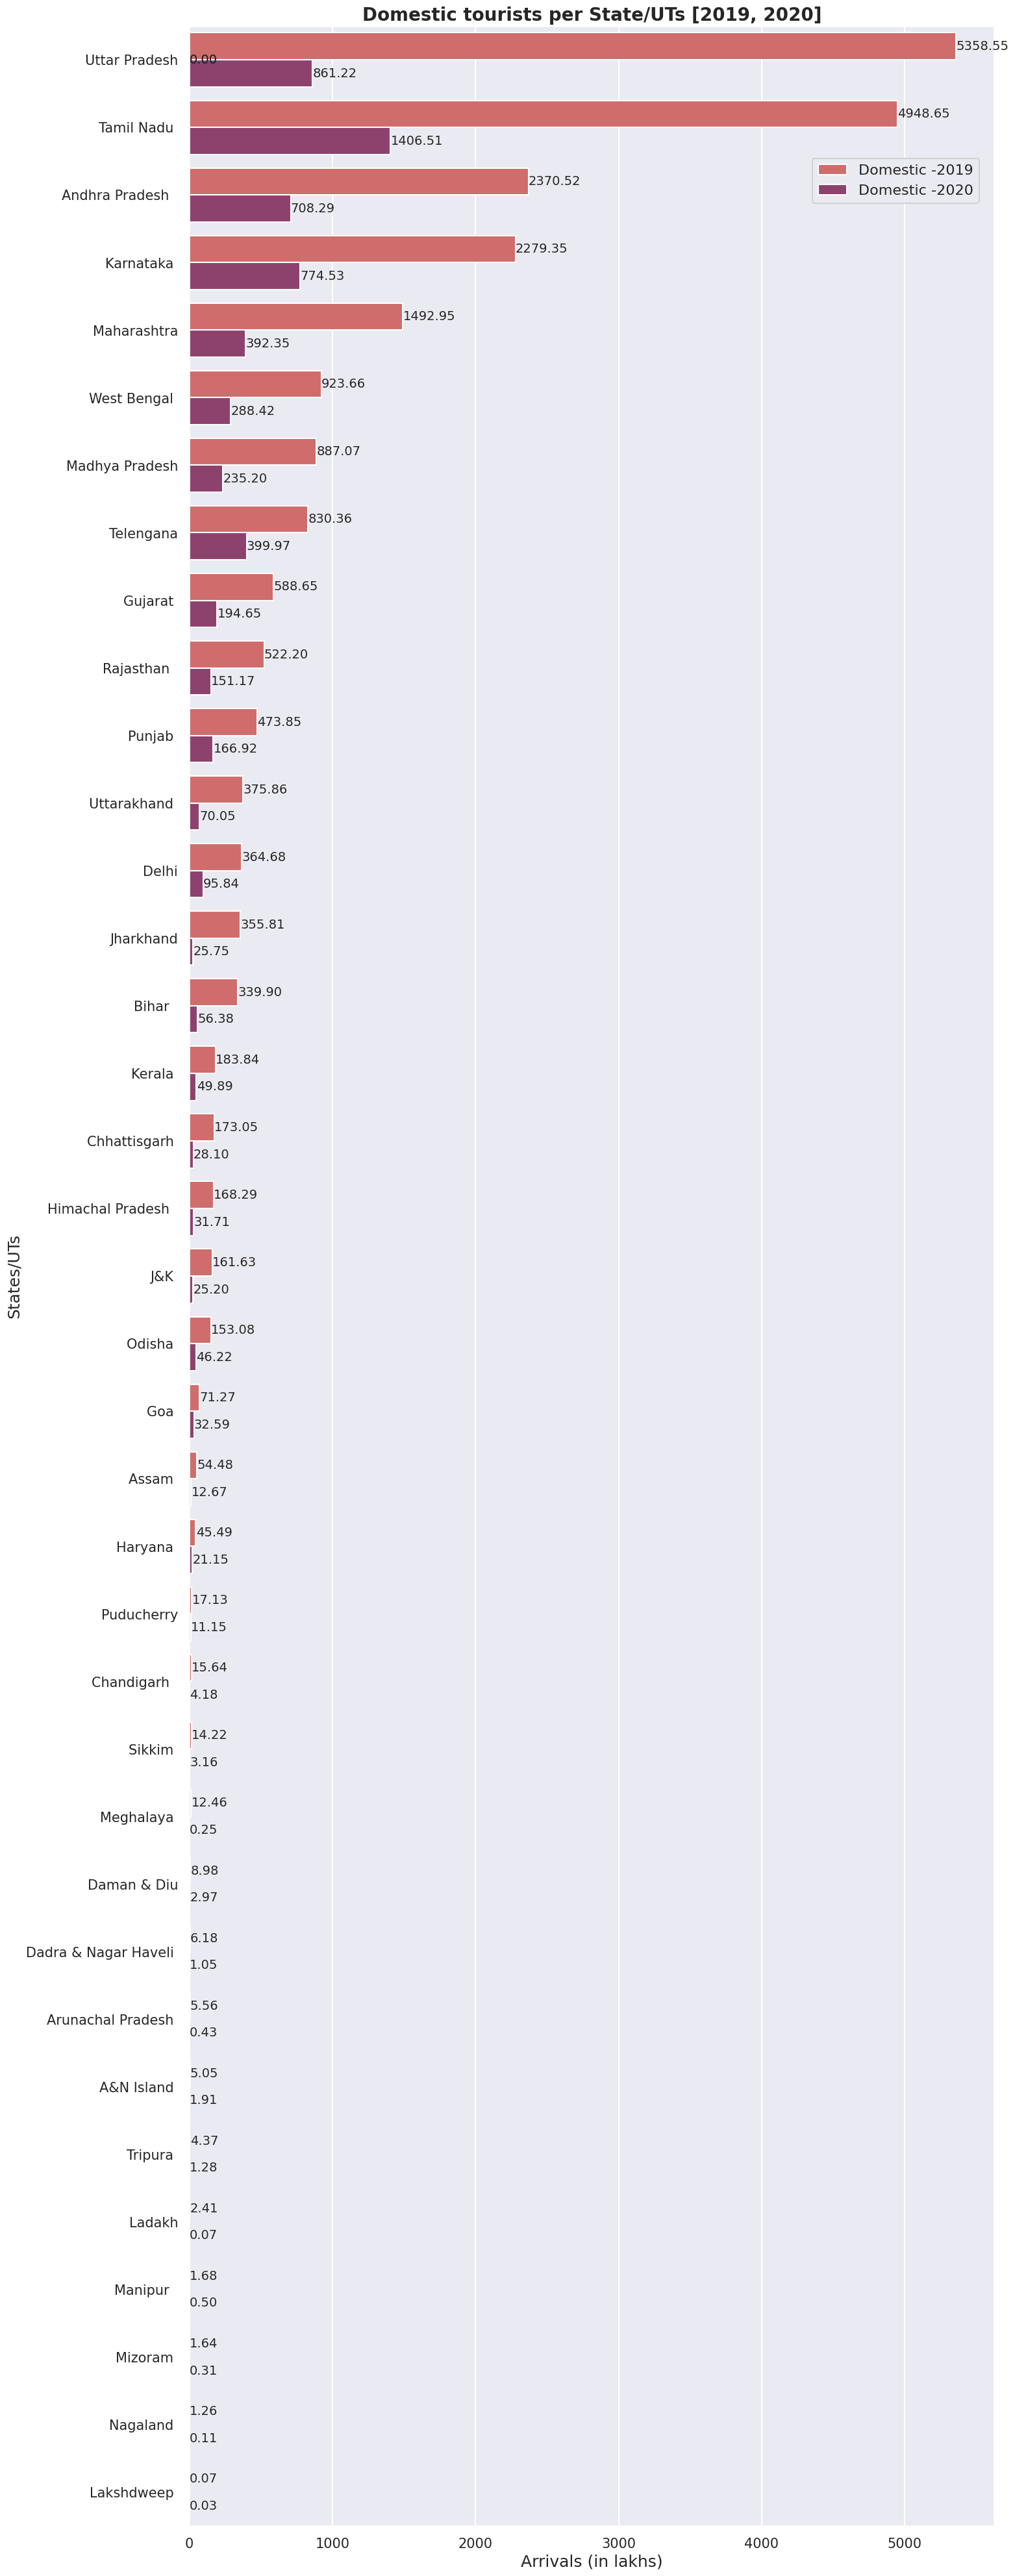

In [43]:
# Combining columns w.r.t 'States/UTs' into a single column 'value' and column 'variable' will distinguish these values
df=pd.melt(domestic_statewise,['States/UTs']).rename(columns={"variable":"Year"})

# plotting data on horizontal bar graph
plt.figure(figsize=(16,50))
ax = sns.barplot(x="value", y="States/UTs", data=df, hue='Year', palette='flare')

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center',  # vertical alignment
            fontsize=14)

plt.title("Domestic tourists per State/UTs [2019, 2020]", fontsize=20, fontweight='bold')
plt.xlabel("Arrivals (in lakhs)", fontsize=18)
plt.ylabel("States/UTs", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(bbox_to_anchor=(0.99,0.95), prop={'size': 16})

# display the chart
plt.show()



Total tourists per State/UTs [2019 - 2020]

Preparing the Dataset

In [44]:
# parsing the dataframe
total_statewise=statewise_data[['States/UTs','Domestic -2019','Foreign - 2019','Domestic -2020','Foreign - 2020']].copy()
# calculating total tourists to States/UTs
total_statewise['Total Tourists']= total_statewise['Domestic -2019']+ total_statewise['Foreign - 2019']+ total_statewise['Domestic -2020']+ total_statewise['Foreign - 2020']
# dropping columns
total_statewise.drop(['Domestic -2019','Foreign - 2019','Domestic -2020','Foreign - 2020'], axis=1, inplace=True)
# sorting by Total Tourists in descending order
total_statewise.sort_values(by=["Total Tourists"], ascending=False, inplace=True)
total_statewise=total_statewise[total_statewise['States/UTs'].isin(['Grand Total'])==False]
# shifting the decimal places by 6 to the left
total_statewise["Total Tourists"]=total_statewise['Total Tourists']* 10**-6

# fetching the 10 most visited States/UTs
total_statewise=total_statewise.iloc[0:10]

total_statewise.head()


,States/UTs,Total Tourists
31,Tamil Nadu,643.611148
34,Uttar Pradesh,627.613568
1,Andhra Pradesh,308.228045
16,Karnataka,306.162132
21,Maharashtra,195.320407



Visualizing the Dataset

<ipython-input-46-b173f8120234>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.barplot(x=total_statewise['States/UTs'], y=total_statewise['Total Tourists'], palette='YlOrBr_r')


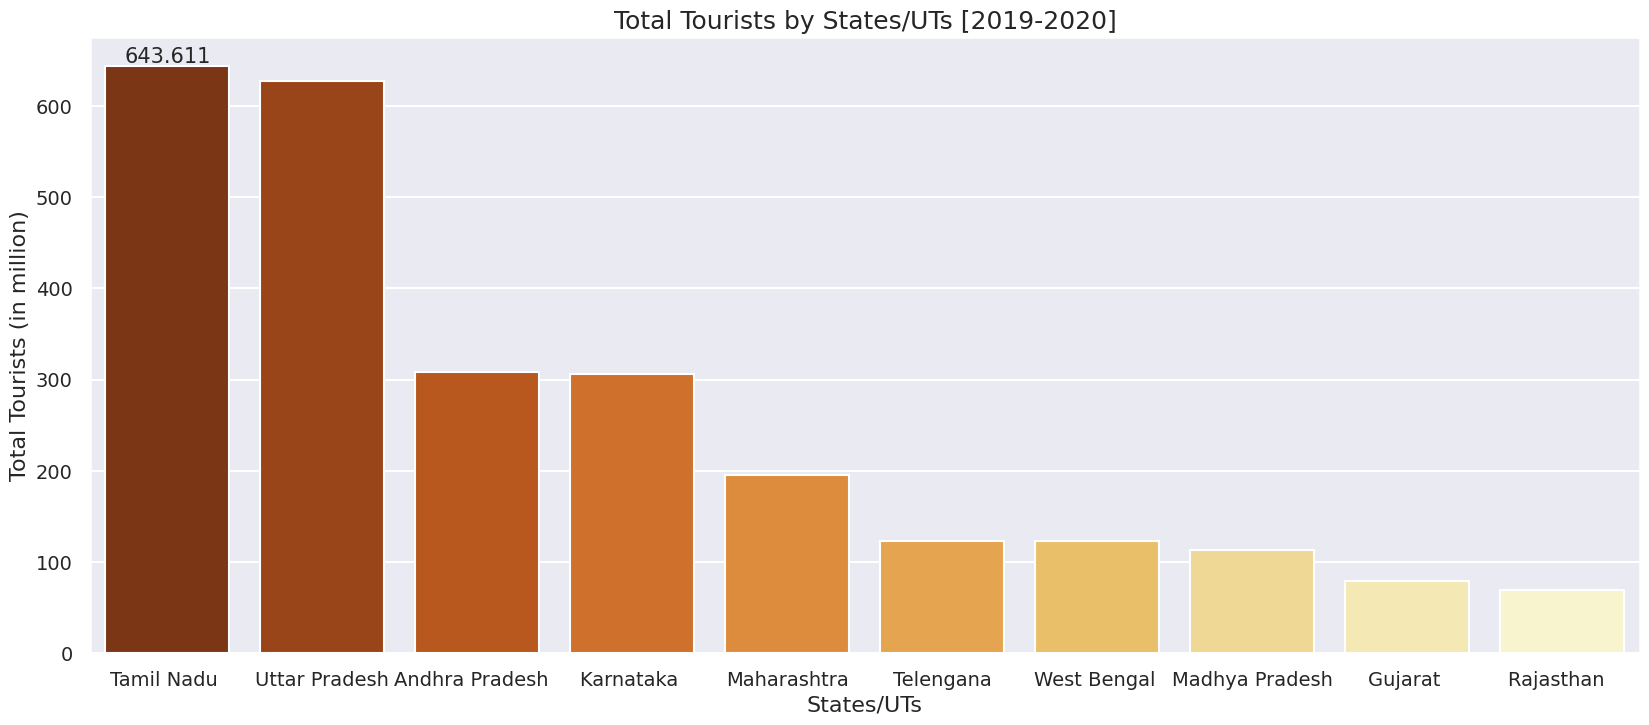

In [46]:

# plotting the bar graph
plt.figure(figsize=(20,8))

g=sns.barplot(x=total_statewise['States/UTs'], y=total_statewise['Total Tourists'], palette='YlOrBr_r')

plt.title("Total Tourists by States/UTs [2019-2020]", fontsize=18)
plt.xlabel("States/UTs", fontsize=16)
plt.ylabel("Total Tourists (in million)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

g.bar_label(g.containers[0], fontsize=15) # labelling the bars

# displaying the chart
plt.show()

Popular monuments during 2019,2020,2021

Top 10 Tourism Destinations visited by foreigners 2019

Preparing the Dataset

In [47]:

# fetching data from the csv file
monuments=pd.read_csv('India-Tourism-Statistics-2021-monuments.csv')
monuments.head()

,Circle,Name of the Monument,Domestic-2019-20,Foreign-2019-20,Domestic-2020-21,Foreign-2020-21,% Growth 2021-21/2019-20-Domestic,% Growth 2021-21/2019-20-Foreign
0,Agra,Taj Mahal,4429710,645415,1259892,9034,-71.56,-98.60
1,Agra,Agra Fort,1627154,386522,371242,2810,-77.18,-99.27
2,Agra,Fatehpur Sikri,454376,184751,107835,574,-76.27,-99.69
3,Agra,Akbar Tomb Sikandra,229270,19625,99509,321,-56.60,-98.36
4,Agra,Mariam tomb Sikandra,22517,414,9765,31,-56.63,-92.51


In [48]:
# parsing the dataframe
circlewise_tourist=monuments[monuments['Name of the Monument']=='Total'].copy()
circlewise_tourist=circlewise_tourist[['Circle','Foreign-2019-20','Domestic-2019-20']]
# sorting by Foreign-2019-20 in descending order
circlewise_tourist.sort_values(by=['Foreign-2019-20'],ascending=False,inplace= True)

# shifting the decimal places by 3 to the left
circlewise_tourist['Foreign-2019-20']= circlewise_tourist['Foreign-2019-20']* 10**-3
circlewise_tourist['Domestic-2019-20']= circlewise_tourist['Domestic-2019-20']* 10**-3

circlewise_tourist.head()

,Circle,Foreign-2019-20,Domestic-2019-20
9,Agra,1394.635,7632.914
133,Delhi,581.350,6158.331
25,Sarnath,106.938,847.571
149,Jaipur,88.692,286.164
30,Thrissur,83.629,1044.418


<ipython-input-49-763d10711acb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.barplot(x=circlewise_tourist['Circle'].iloc[0:10], y=circlewise_tourist['Foreign-2019-20'].iloc[0:10], palette='mako')


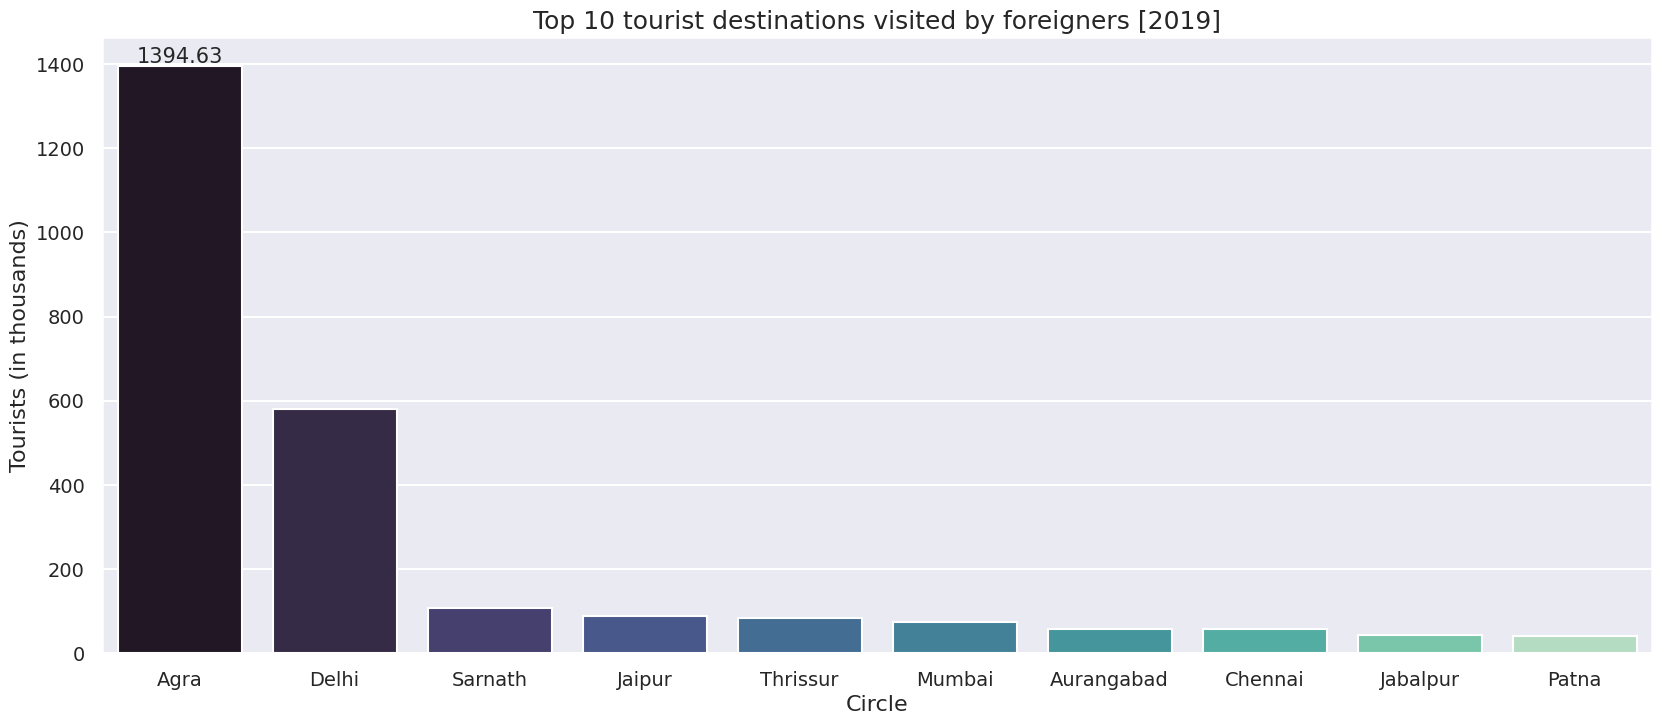

In [49]:
# plotting the bar graph
plt.figure(figsize=(20,8))

g=sns.barplot(x=circlewise_tourist['Circle'].iloc[0:10], y=circlewise_tourist['Foreign-2019-20'].iloc[0:10], palette='mako')

plt.title("Top 10 tourist destinations visited by foreigners [2019]", fontsize=18)
plt.xlabel("Circle", fontsize=16)
plt.ylabel("Tourists (in thousands)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

g.bar_label(g.containers[0], fontsize=15) # labelling the bars

# displaying the chart
plt.show()

Top 10 Tourism Destinations visited by domestic travellers 2019

Preparing and Visualizing the Dataset

<ipython-input-50-61bd84d74349>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.barplot(x=circlewise_tourist['Circle'].iloc[0:10], y=circlewise_tourist['Domestic-2019-20'].iloc[0:10], palette='mako')


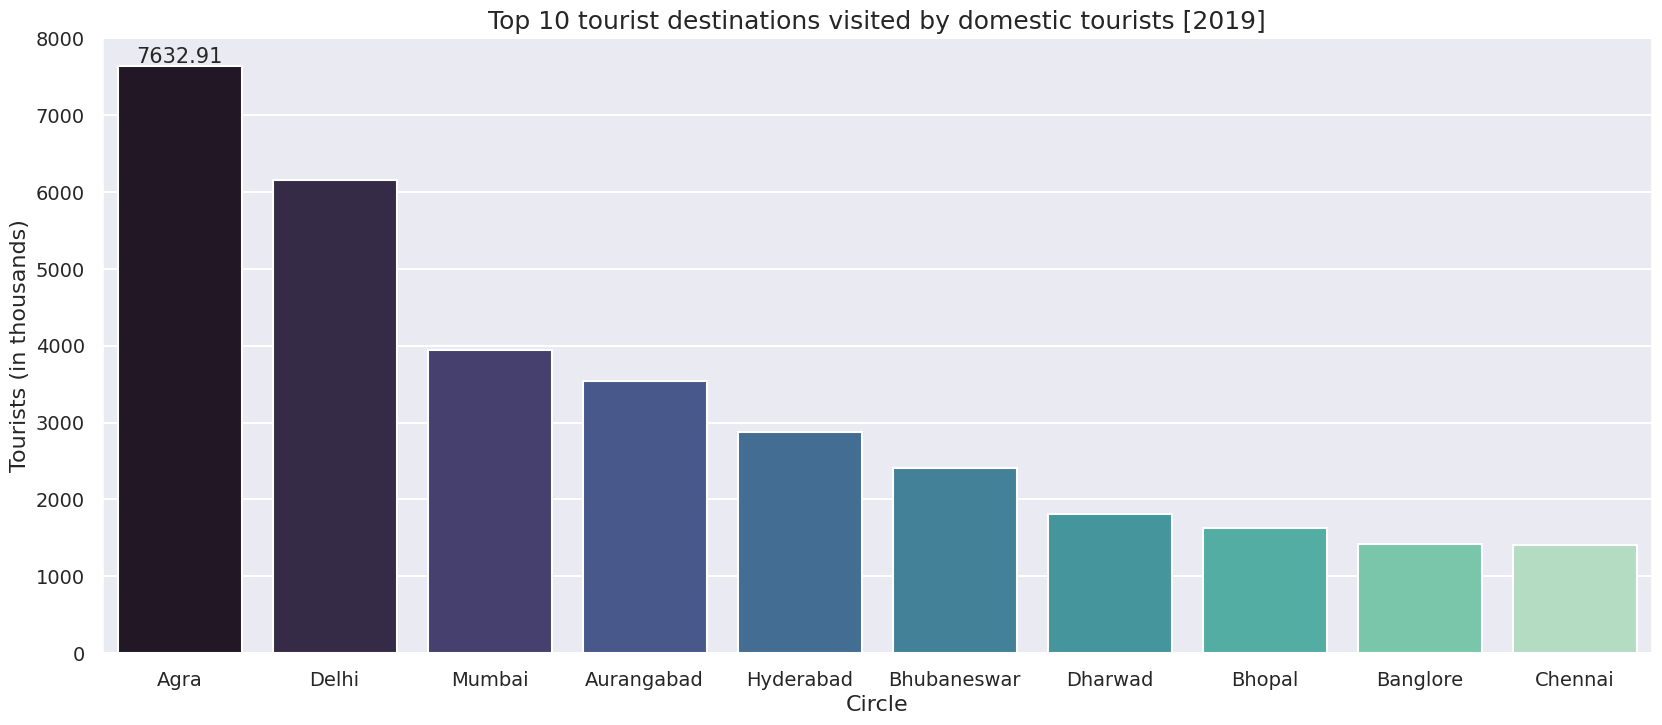

In [50]:
# sorting by Domestic-2019-20 in descending order
circlewise_tourist.sort_values(by=['Domestic-2019-20'],ascending=False,inplace= True)

# plotting data on bar graph
plt.figure(figsize=(20,8))

g=sns.barplot(x=circlewise_tourist['Circle'].iloc[0:10], y=circlewise_tourist['Domestic-2019-20'].iloc[0:10], palette='mako')

plt.title("Top 10 tourist destinations visited by domestic tourists [2019]", fontsize=18)
plt.xlabel("Circle", fontsize=16)
plt.ylabel("Tourists (in thousands)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

g.bar_label(g.containers[0], fontsize=15) #labelling bars

# displaying chart
plt.show()

Top 10 Monuments visited by foreigners 2019

Preparing the Dataset

In [51]:
# Parsing the dataframe
monument_tourist=monuments[monuments['Name of the Monument'].isin(['Total','Grand Total'])==False].copy()
# Modifying the contents
monument_tourist['Name of the Monument'] = monument_tourist['Name of the Monument']+" ("+monument_tourist['Circle']+")"

# parsing the dataframe
monument_tourist=monument_tourist[['Name of the Monument','Foreign-2019-20','Domestic-2019-20']]
# sorting by Foreign-2019-20 in descending order
monument_tourist.sort_values(by=['Foreign-2019-20'],ascending=False,inplace= True)

# shifting the decimal places by 3 to the left
monument_tourist['Foreign-2019-20']= monument_tourist['Foreign-2019-20']* 10**-3
monument_tourist['Domestic-2019-20']= monument_tourist['Domestic-2019-20']* 10**-3

monument_tourist.head()

,Name of the Monument,Foreign-2019-20,Domestic-2019-20
0,Taj Mahal (Agra),645.415,4429.710
1,Agra Fort (Agra),386.522,1627.154
127,Qutub Minar (Delhi),255.318,2048.146
126,Humayun Tomb (Delhi),202.288,658.318
2,Fatehpur Sikri (Agra),184.751,454.376


Visualizing the Dataset

<ipython-input-52-fe2818de703a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.barplot(x=[ str(i) for i in range(1,11)], y=monument_tourist['Foreign-2019-20'].iloc[0:10], palette='rocket')


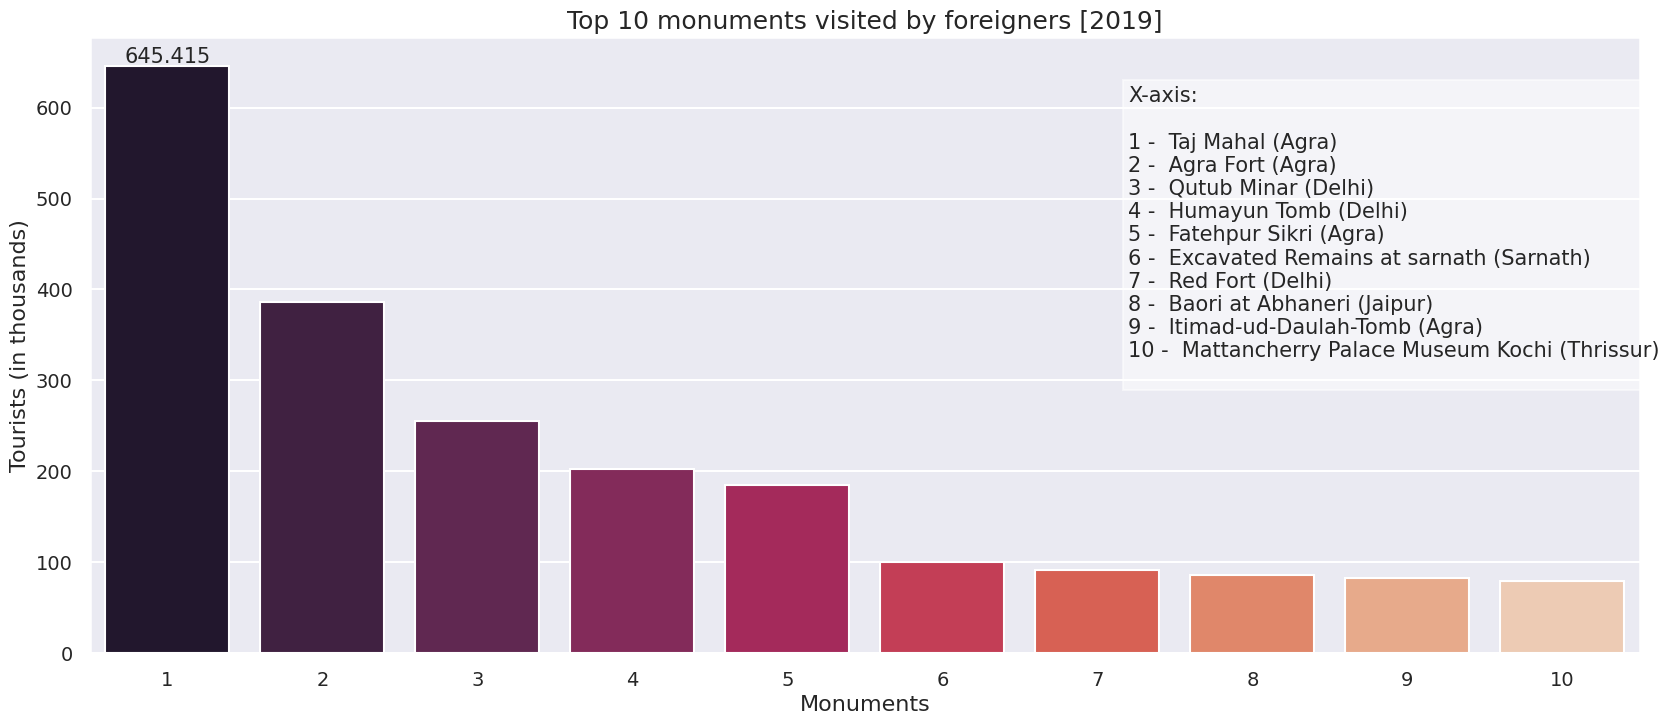

In [52]:
# displaying data on bar chart
plt.figure(figsize=(20,8))

# picking top 10 visited monuments
x=monument_tourist['Name of the Monument'].iloc[0:10]

g=sns.barplot(x=[ str(i) for i in range(1,11)], y=monument_tourist['Foreign-2019-20'].iloc[0:10], palette='rocket')

plt.title("Top 10 monuments visited by foreigners [2019]", fontsize=18)
plt.xlabel("Monuments", fontsize=16)
plt.ylabel("Tourists (in thousands)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Textbox contents
text="X-axis:\n\n"
for i,value in zip(range(1,11),x):
    text= text + str(i) + " -  " + value + "\n"

plt.text(6.2, 300, text, fontsize = 15,
         bbox = dict(facecolor = 'white', alpha = 0.5))

g.bar_label(g.containers[0], fontsize=15) #labelling bars

# displaying chart
plt.show()

Top 10 Monuments visited by domestic travellers 2019

Preparing and Visualizing the Dataset

<ipython-input-53-d900205fecbd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.barplot(x=[ str(i) for i in range(1,11)], y=monument_tourist['Domestic-2019-20'].iloc[0:10], palette='rocket')


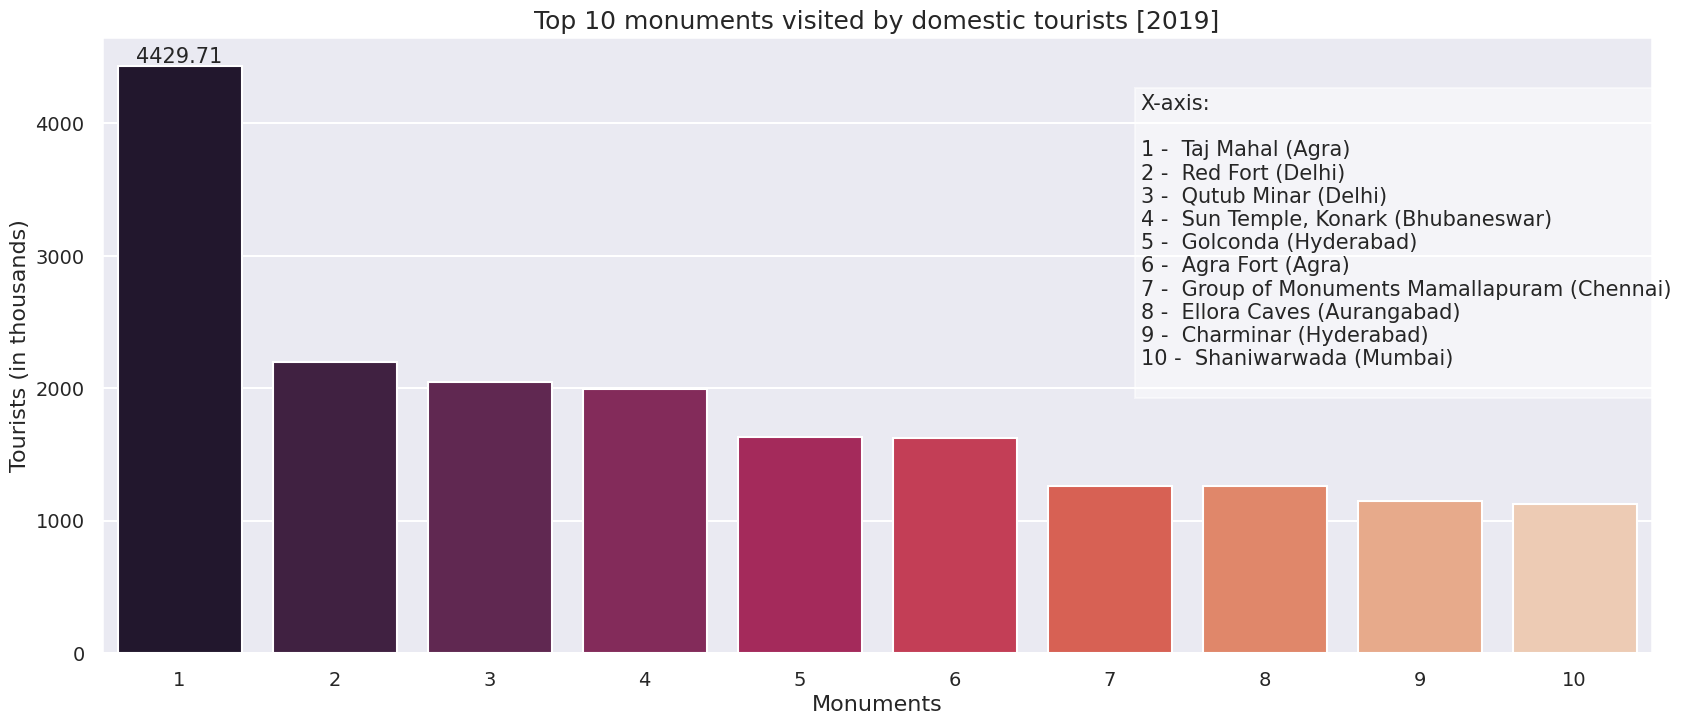

In [53]:
# sorting by Domestic-2019-20 in descending order
monument_tourist.sort_values(by=['Domestic-2019-20'],ascending=False,inplace= True)

# displaying data on bar chart
plt.figure(figsize=(20,8))

# picking top 10 visited monuments
x=monument_tourist['Name of the Monument'].iloc[0:10]

g=sns.barplot(x=[ str(i) for i in range(1,11)], y=monument_tourist['Domestic-2019-20'].iloc[0:10], palette='rocket')

plt.title("Top 10 monuments visited by domestic tourists [2019]", fontsize=18)
plt.xlabel("Monuments", fontsize=16)
plt.ylabel("Tourists (in thousands)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Textbox contents
text="X-axis:\n\n"
for i,value in zip(range(1,11),x):
    text= text + str(i) + " -  " + value + "\n"

plt.text(6.2, 2000, text, fontsize = 15,
         bbox = dict(facecolor = 'white', alpha = 0.5))

g.bar_label(g.containers[0], fontsize=15) #labelling bars

# displaying chart
plt.show()

Position of Indian Tourism in the world [2001 - 2021]

Preparing the Dataset

In [54]:
# fetching data from the csv file
worldvsindia= pd.read_csv('India-Tourism-Statistics-2001-2019-worldvsindia.csv')
worldvsindia.head()

,Year,World - Number (in million),World - % Change,India - Number (in million),India - % Change,Percentage Share of India,Rank of India
0,2001,683.4,0.0,2.54,-4.2,0.37,51st
1,2002,703.2,2.9,2.38,-6.3,0.34,54th
2,2003,691.0,-1.7,2.73,14.7,0.40,51st
3,2004,762.0,10.3,3.46,26.7,0.45,44th
4,2005,803.4,5.4,3.92,13.3,0.49,43rd


In [55]:
# Parsing the dataframe
worldvsindia_rank=worldvsindia[['Year','World - Number (in million)','India - Number (in million)','Rank of India']].copy()
worldvsindia_rank.fillna('NA',inplace=True)
worldvsindia_rank


,Year,World - Number (in million),India - Number (in million),Rank of India
0,2001,683.4,2.54,51st
1,2002,703.2,2.38,54th
2,2003,691.0,2.73,51st
3,2004,762.0,3.46,44th
4,2005,803.4,3.92,43rd
5,2006,846.6,4.45,44th
6,2007,894.0,5.08,41st
7,2008,917.0,5.28,41st
8,2009,883.0,5.17,41st
9,2010,948.0,5.78,42nd


Visualizing the Dataset

[]

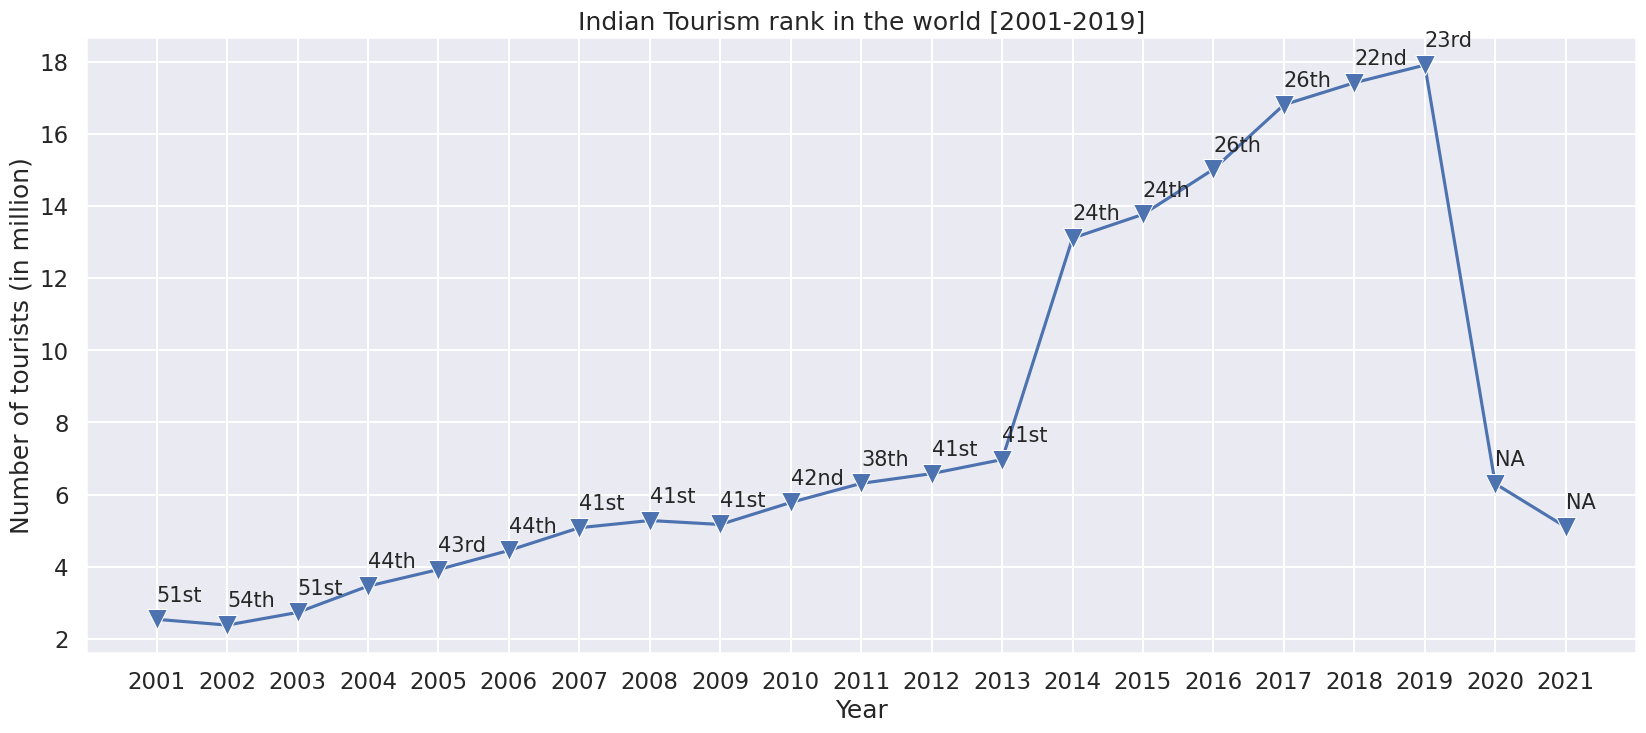

In [56]:
# df=pd.melt(worldvsindia_rank,['Year','Rank of India']).rename(columns={"variable":"World vs India"})

# displaying data on line chart
plt.figure(figsize=(20,8))

# sns.set_context("talk")

g=sns.lineplot(x='Year', y='India - Number (in million)', data=worldvsindia_rank, marker= 'v', markersize=14)
g.set(xlabel="Year",ylabel="Number of tourists (in million)", title="Indian Tourism rank in the world [2001-2019]")

plt.xticks(
    range(2001,2022),
    fontweight='light'
)

# label markers with ranks
for x,index in zip(g.get_xticks(),worldvsindia_rank.index):
    g.text(x,worldvsindia_rank._get_value(index,'India - Number (in million)')+0.5, worldvsindia_rank._get_value(index,'Rank of India'),size=15)

# display the chart
plt.plot()